# Lab 2: Comparing Means
## w203 Statistics for Data Science

## The Data

The American National Election Studies (ANES) conducts surveys of voters in the United States.  While its flagship survey occurs every four years at the time of each presidential election, ANES also conducts pilot studies midway between these elections.  You are provided with data from the 2018 ANES Pilot Study.

For a glimpse into some of the intricacies that go into the design of this study, take a look at the introduction to the [ANES User's Guide and Codebook](https://electionstudies.org/wp-content/uploads/2019/02/anes_pilot_2018_userguidecodebook.pdf).

It is important to consider the way that the ANES sample was created.  Survery participants are taken from the YouGov panel, which is an online system in which users earn rewards for completing questionnaires.  This feature limits the extent to which results generalize to the U.S. population.

To partially account for differences between the YouGov panel and the U.S. Population, ANES assigns a survey weight to each observation.  This weight estimates the degree to which a citizen with certain observed characteristics is over- or under-represented in the sample.  For the purposes of this assignment, however, you are not asked to use the survey weights.  (For groups with a strong interest in survey analysis, we recommend that you read about R's [survey package](http://r-survey.r-forge.r-project.org/survey/).  We will assign a very small number of bonus points (up to 3) to any group that correctly applies the survey weights and includes a clear explanation of how these work).

In [1]:
getwd()

[1] "C:/Users/micha/Desktop/lab_2-master"

In [2]:
library(plyr)
library(dplyr)
library(ggplot2)
library(summarytools)
library(coin)
library(effsize)
library(tidyverse)
library(lsr)
library(corrplot)


Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp

For best results, restart R session and update pander using devtools:: or remotes::install_github('rapporter/pander')

Loading required package: survival

Warning message:
"package 'effsize' was built under R version 4.0.2"
Warning message:
"package 'tidyverse' was built under R version 4.0.2"
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.1     v purrr   0.3.4
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::ar

In [3]:
A = read.csv("anes_pilot_2018.csv")
head(A)
nrow(A)

,ï..version,caseid,weight,weight_spss,form,follow,addtime,reg,whenreg,howreg,...,rand_emp,rand_climate,rand_rural,rand_pk,rand_pid,starttime,endtime,duration,optintimestamp,completes
,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>
1,ANES 2018 Pilot Study main version 20190129,1,1.2555080,0.7286969,1,4,2,1,4,-1,...,1,2,2,1,1,12/10/2018 18:34,12/10/2018 20:00,5152,10/15/2015,46
2,ANES 2018 Pilot Study main version 20190129,2,0.5694911,0.3305327,2,1,2,3,-1,-1,...,2,1,1,0,2,12/10/2018 19:26,12/10/2018 19:53,1595,7/16/2016,55
3,ANES 2018 Pilot Study main version 20190129,3,0.9720616,0.5641846,1,4,3,3,-1,-1,...,2,2,1,1,2,12/10/2018 19:48,12/10/2018 20:21,1957,6/13/2014,8
4,ANES 2018 Pilot Study main version 20190129,4,2.4500732,1.4220225,1,4,2,1,4,-1,...,2,2,1,0,1,12/10/2018 19:03,12/10/2018 19:21,1039,10/28/2015,42
5,ANES 2018 Pilot Study main version 20190129,5,1.6348200,0.9488495,2,1,3,1,4,-1,...,2,1,2,1,2,12/10/2018 18:28,12/10/2018 18:43,909,11/11/2015,33
6,ANES 2018 Pilot Study main version 20190129,6,1.8184054,1.0554025,1,3,2,2,2,2,...,1,2,1,1,2,12/10/2018 23:58,12/11/2018 5:10,18760,5/9/2015,185


[1] 2500

Following is an example of a question asked on the ANES survey:

> How difficult was it for you to vote in this last election?

The variable `votehard` records answers to this question, with the following encoding:

- -1 inapplicable, legitimate skip
- 1 Not difficult at all
- 2 A little difficult
- 3 Moderately difficult
- 4 Very difficult
- 5 Extremely difficult


To see the precise form of each question, take a look at the [Questionnaire Specifications](https://electionstudies.org/wp-content/uploads/2018/12/anes_pilot_2018_questionnaire.pdf).

## Assignment

You will use the ANES dataset to address five research questions.  For each question, you will need to operationalize the concepts (selecting appropriate variables and possibly transforming them), conduct exploratory analysis, deal with non-response and other special codes, perform sanity checks, select an appropriate hypothesis test, conduct the test, and interpret your results.  When selecting a hypothesis test, you may choose from the tests covered in the async videos and readings.  These include both paired and unpaired t-tests, Wilcoxon rank-sum test, Wilcoxon signed-rank test, and sign test.  You may select a one-tailed or two-tailed test.

Please organize your response according to the prompts in this notebook.

Note that this is a group lab.  There is a **maximum of three students per team.**
Although you may work on your own, we do not recommend this (we have found that individuals tend to do worse than teams on past labs).

Please limit your submission to 5000 words, not counting code or figures.  We will use some python code like the following to perform the wordcount on your notebook or Rmd file.

```
import nbformat

with open('W203_Lab_2.ipynb') as f:
    nb = nbformat.read(f, as_version=4)
    total_words = 0

    for cell in nb['cells']:
        if cell['cell_type'] == 'markdown':
            total_words += len(cell['source'].split())
    print("Total words:", total_words)
```


## Submission Guidelines
- Submit _one_ report per group.
- Submit *both* your pdf report as well as your source file.
- **Only analyses and comments included in your PDF report will be considered for grading.**
- Include names of group members on the front page of the submitted report.
- Naming structure of submitted files:
    - PDF report: [student_surname_1]\_[student_surname_2][\_*]\_lab\_2.pdf
    - Jupyter Notebook: [student_surname_1]\_[student_surname_2][\_*]\_lab\_2.ipynb


# Research Questions

## Question 1: Do US voters have more respect for the police or for journalists?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

> For research question 1, we would like to understand the sentiment of US voters towards police/law enforcement and journalist in terms of respect. More specifically, we would like to evaluate if there are significant differences in the respect measure between the 2 occupation groups.
>
> First and foremost, we are interested in registered voters, since the question states "US voters" and the only method to determine voters from the population is through their registration status. From the survey question, we can use the **reg** (Are you registered to vote, or not?) variable to determine if the survey respondent was a registered voter or not.
>
> Second, there are 2 questions in the survey that prompted particpants to gauge their rating of both the police and journalists based on a likert scale of 0 to 100. The resulting variables are:
> - **ftpolice**: How would you rate the police?
> - **ftjournal**: How would rate journalists?
>
> Although the rating is not explicitly a measure of respect, but the overall favorability sentiment towards either occupation, respect can be inferred (i.e. people tend to show respect for individuals in which they look up to or revere). However, a limitation for our extrapolation is that "rate" could be open to different interpretations by different respondents. Thus, we don't know that if respondents are scoring police and journalists based on their effectiveness, contribution to society, as professions or by any other benchmarks.
>
> Additionally, the 0 - 100 likert scale is an inprecise method of measurement of respect, since 2 respondents could have the same sentiment towards a group, but resulting in different scores. This makes generalizing respect level difficult due to a varibility in respondent's personal interpretation and mapping of respect to a numeric score.

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

In [4]:
#Step 1: Check to see that all of ftpolice's values are bound between 0 and 100.
ftp = A$ftpolice
summary(ftp)

max(ftp) #check for max value
min(ftp) #checks for min value

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   47.00   70.00   64.68   90.00  100.00 

[1] 100

[1] 0

In [5]:
#Step 2: Check to see that all of ftjournal's values are bound between 0 and 100.
ftj = A$ftjournal
summary(ftj) 

max(ftj) #check for max value
min(ftj) #checks for min value; min value is negative and requires further investigation

which(ftj == -7) #gets row number of observation in which the score was -7
ftj[ftj==-7] = NA

summary(ftj) #Rechecking all values are correctly bounded between 0 - 100. We won't use the 2 "NA" entries in our analysis.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -7.00   21.00   52.00   52.26   82.00  100.00 

[1] 100

[1] -7

[1]  51 597

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   21.00   52.00   52.31   82.00  100.00       2 

In [6]:
#Step 3: Filter out non-registered voters from both the ftp and ftj vectors. Thus, we only keep respondents with a "1" or "2" to the reg variable
A = A %>% filter(reg %in% as.numeric(1:2)) #new table with reg == 1|2
A$ftjournal[A$ftjournal == -7] = NA

In [7]:
#Step 4: create a data frame for both police and journal and then combine in order to draw a combined histogram
dfp = data.frame(score = A$ftpolice)
dfj = data.frame(score = A$ftjournal)

dfp$category = "Police"
dfj$category = "Journalists"

dfc = rbind(dfp, dfj) #combined dataframe
head(dfc)

,score,category
,<int>,<chr>
1,100,Police
2,81,Police
3,73,Police
4,38,Police
5,78,Police
6,90,Police


In [8]:
#Step 4.1: Calculate the mean rating for journalists and police that will be used in our visual inspection via the histogram and density plot
mu = ddply(dfc, "category", summarize, grp.mean = mean(score, na.rm = TRUE), grp.sd = sd(score, na.rm = TRUE))
mu

j_mean = mu[1,2]
p_mean = mu[2,2]

category,grp.mean,grp.sd
<chr>,<dbl>,<dbl>
Journalists,54.13310,33.46564
Police,67.61938,27.57342


Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."


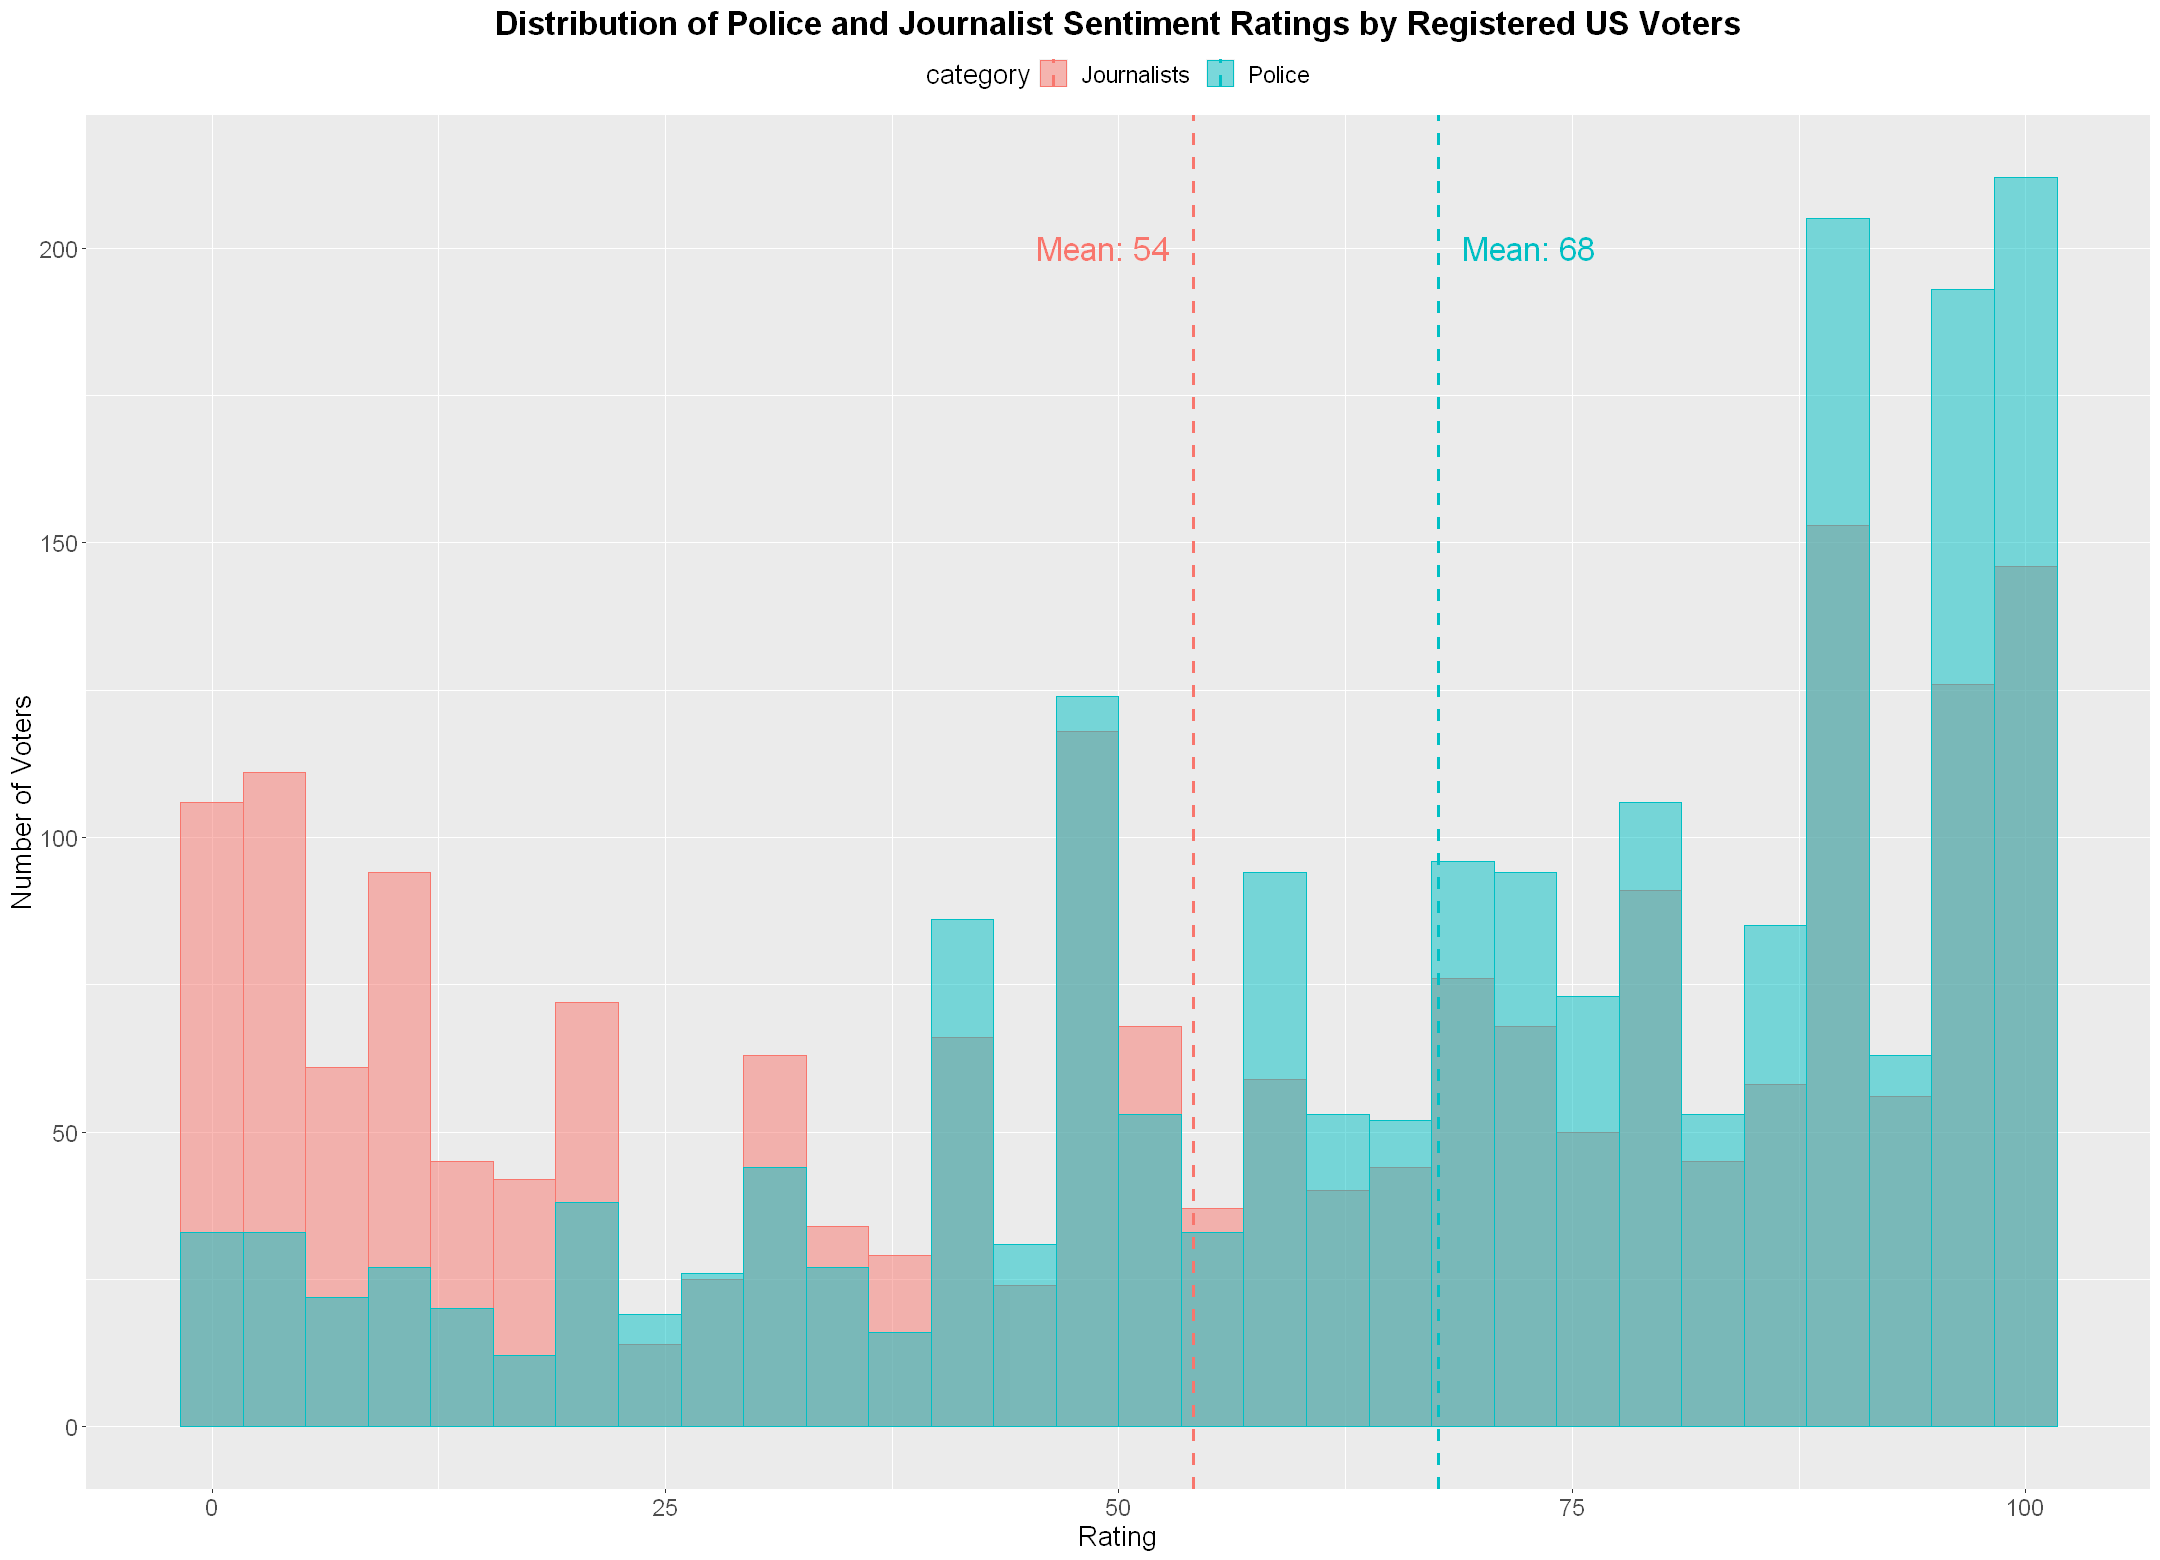

In [9]:
#Step 5: Overlay histogram of both occupation groups to visualize differences in rating distribution
options(repr.plot.width = 18, repr.plot.height = 13)
plot_theme =  theme(plot.title = element_text(size = 20, hjust = .5, face = "bold"), axis.text = element_text(size = 14), axis.title = element_text(size = 16), 
                    legend.title = element_text(size = 16), legend.text=element_text(size = 14), legend.position = "top", 
                    strip.text.y = element_text(size = 16, color = "black", angle = 90))

histo = ggplot(dfc, aes(score, fill = category, color = category)) + 
    geom_histogram(position = "identity", alpha = .5, bins = 30) +
    geom_vline(data = mu, aes(xintercept = grp.mean, color = category), linetype = "dashed", size = 1) +
    annotate(geom = "text", x = j_mean-5, y = 200, label = paste("Mean:", round(j_mean, 0)), color = "#F8766D", size = 7) +
    annotate(geom = "text", x = p_mean + 5, y = 200, label = paste("Mean:", round(p_mean, 0)), color = "#00BFC4", size = 7 ) +
    labs(title = "Distribution of Police and Journalist Sentiment Ratings by Registered US Voters", x = "Rating", y = "Number of Voters") + 
    plot_theme

histo

Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."


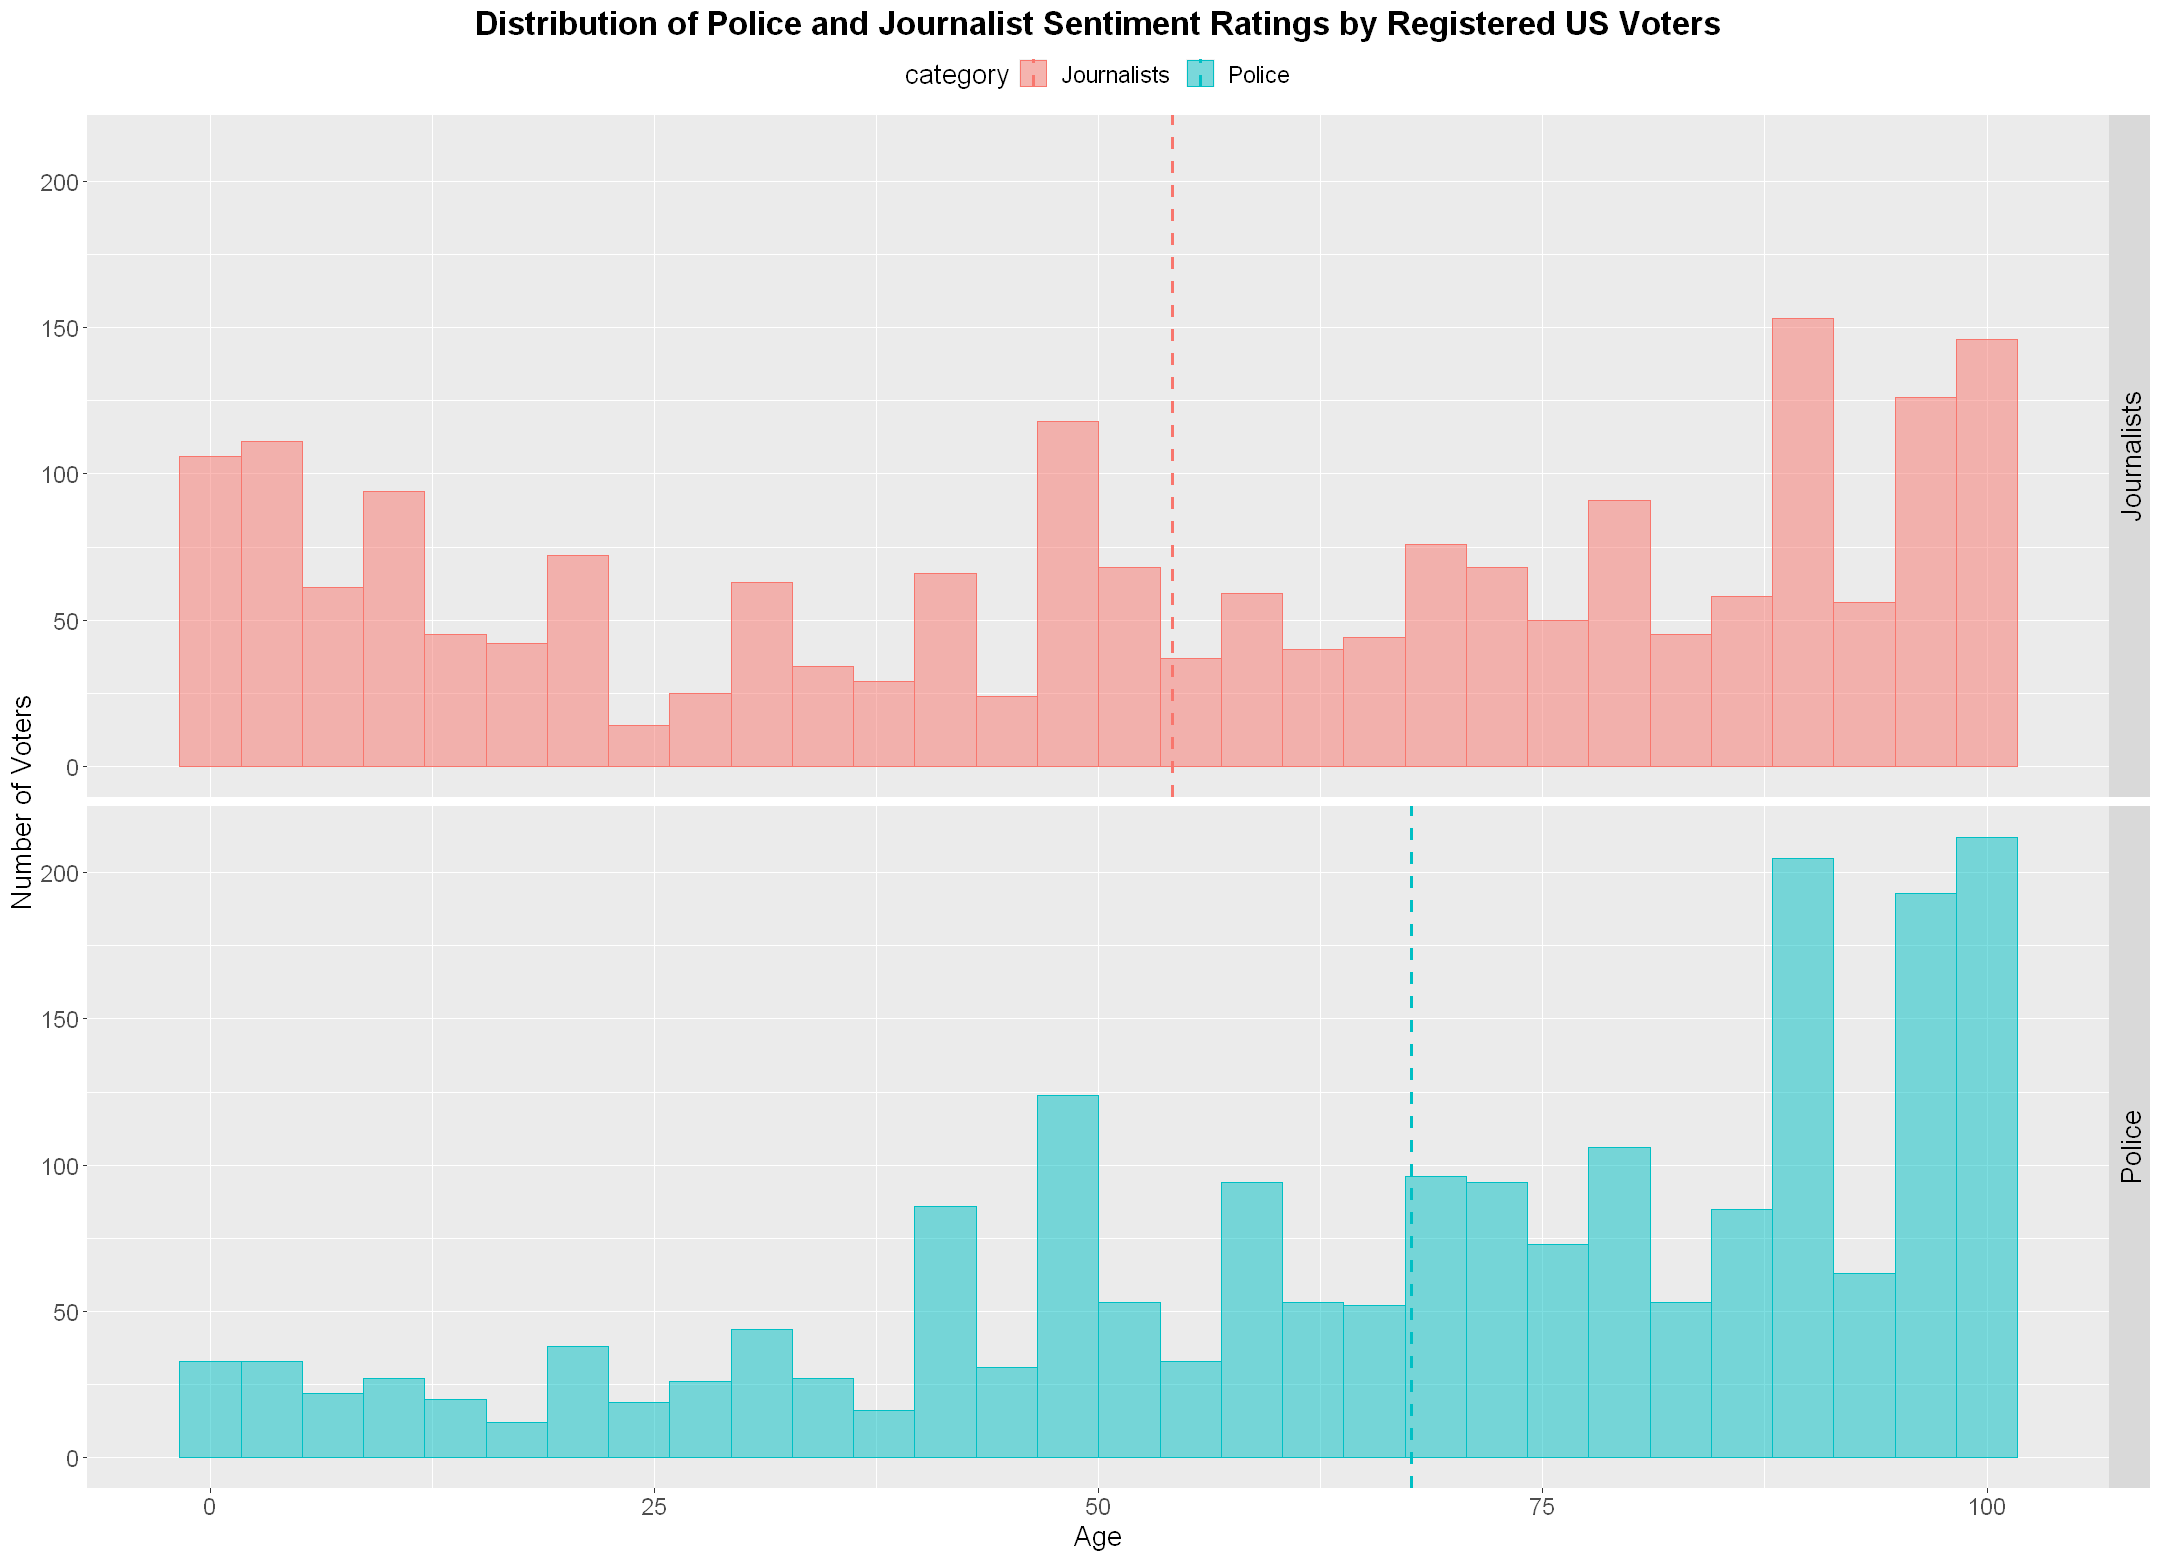

In [10]:
#Facet histogram: Alternative to overlaid histogram above
ggplot(dfc, aes(score, fill = category, color = category)) + 
    geom_histogram(position = "identity", alpha = .5, bins = 30) +
    facet_grid(category ~ .) + 
    geom_vline(data = mu, aes(xintercept = grp.mean, color = category), linetype = "dashed", size = 1) +
    labs(title = "Distribution of Police and Journalist Sentiment Ratings by Registered US Voters", x = "Age", y = "Number of Voters") + 
    plot_theme

>From the histogram, we can observe that there is a higher concentration of lower ratings for journalists than there are for police. Similarily, police possess a greater concentration of high scores than journalists. Moreover, the mean (dashed vertical lines) rating for police officiers is approximately 14 points higher than it is for journalists. 
>
> While the histogram shows the frequency distribution of ratings and can be sensitive to the bin size, a complementary visualization that can help us evaluate differences in respondents' rating is by plotting the density curve of both occupation.  

Warning message:
"Removed 2 rows containing non-finite values (stat_density)."


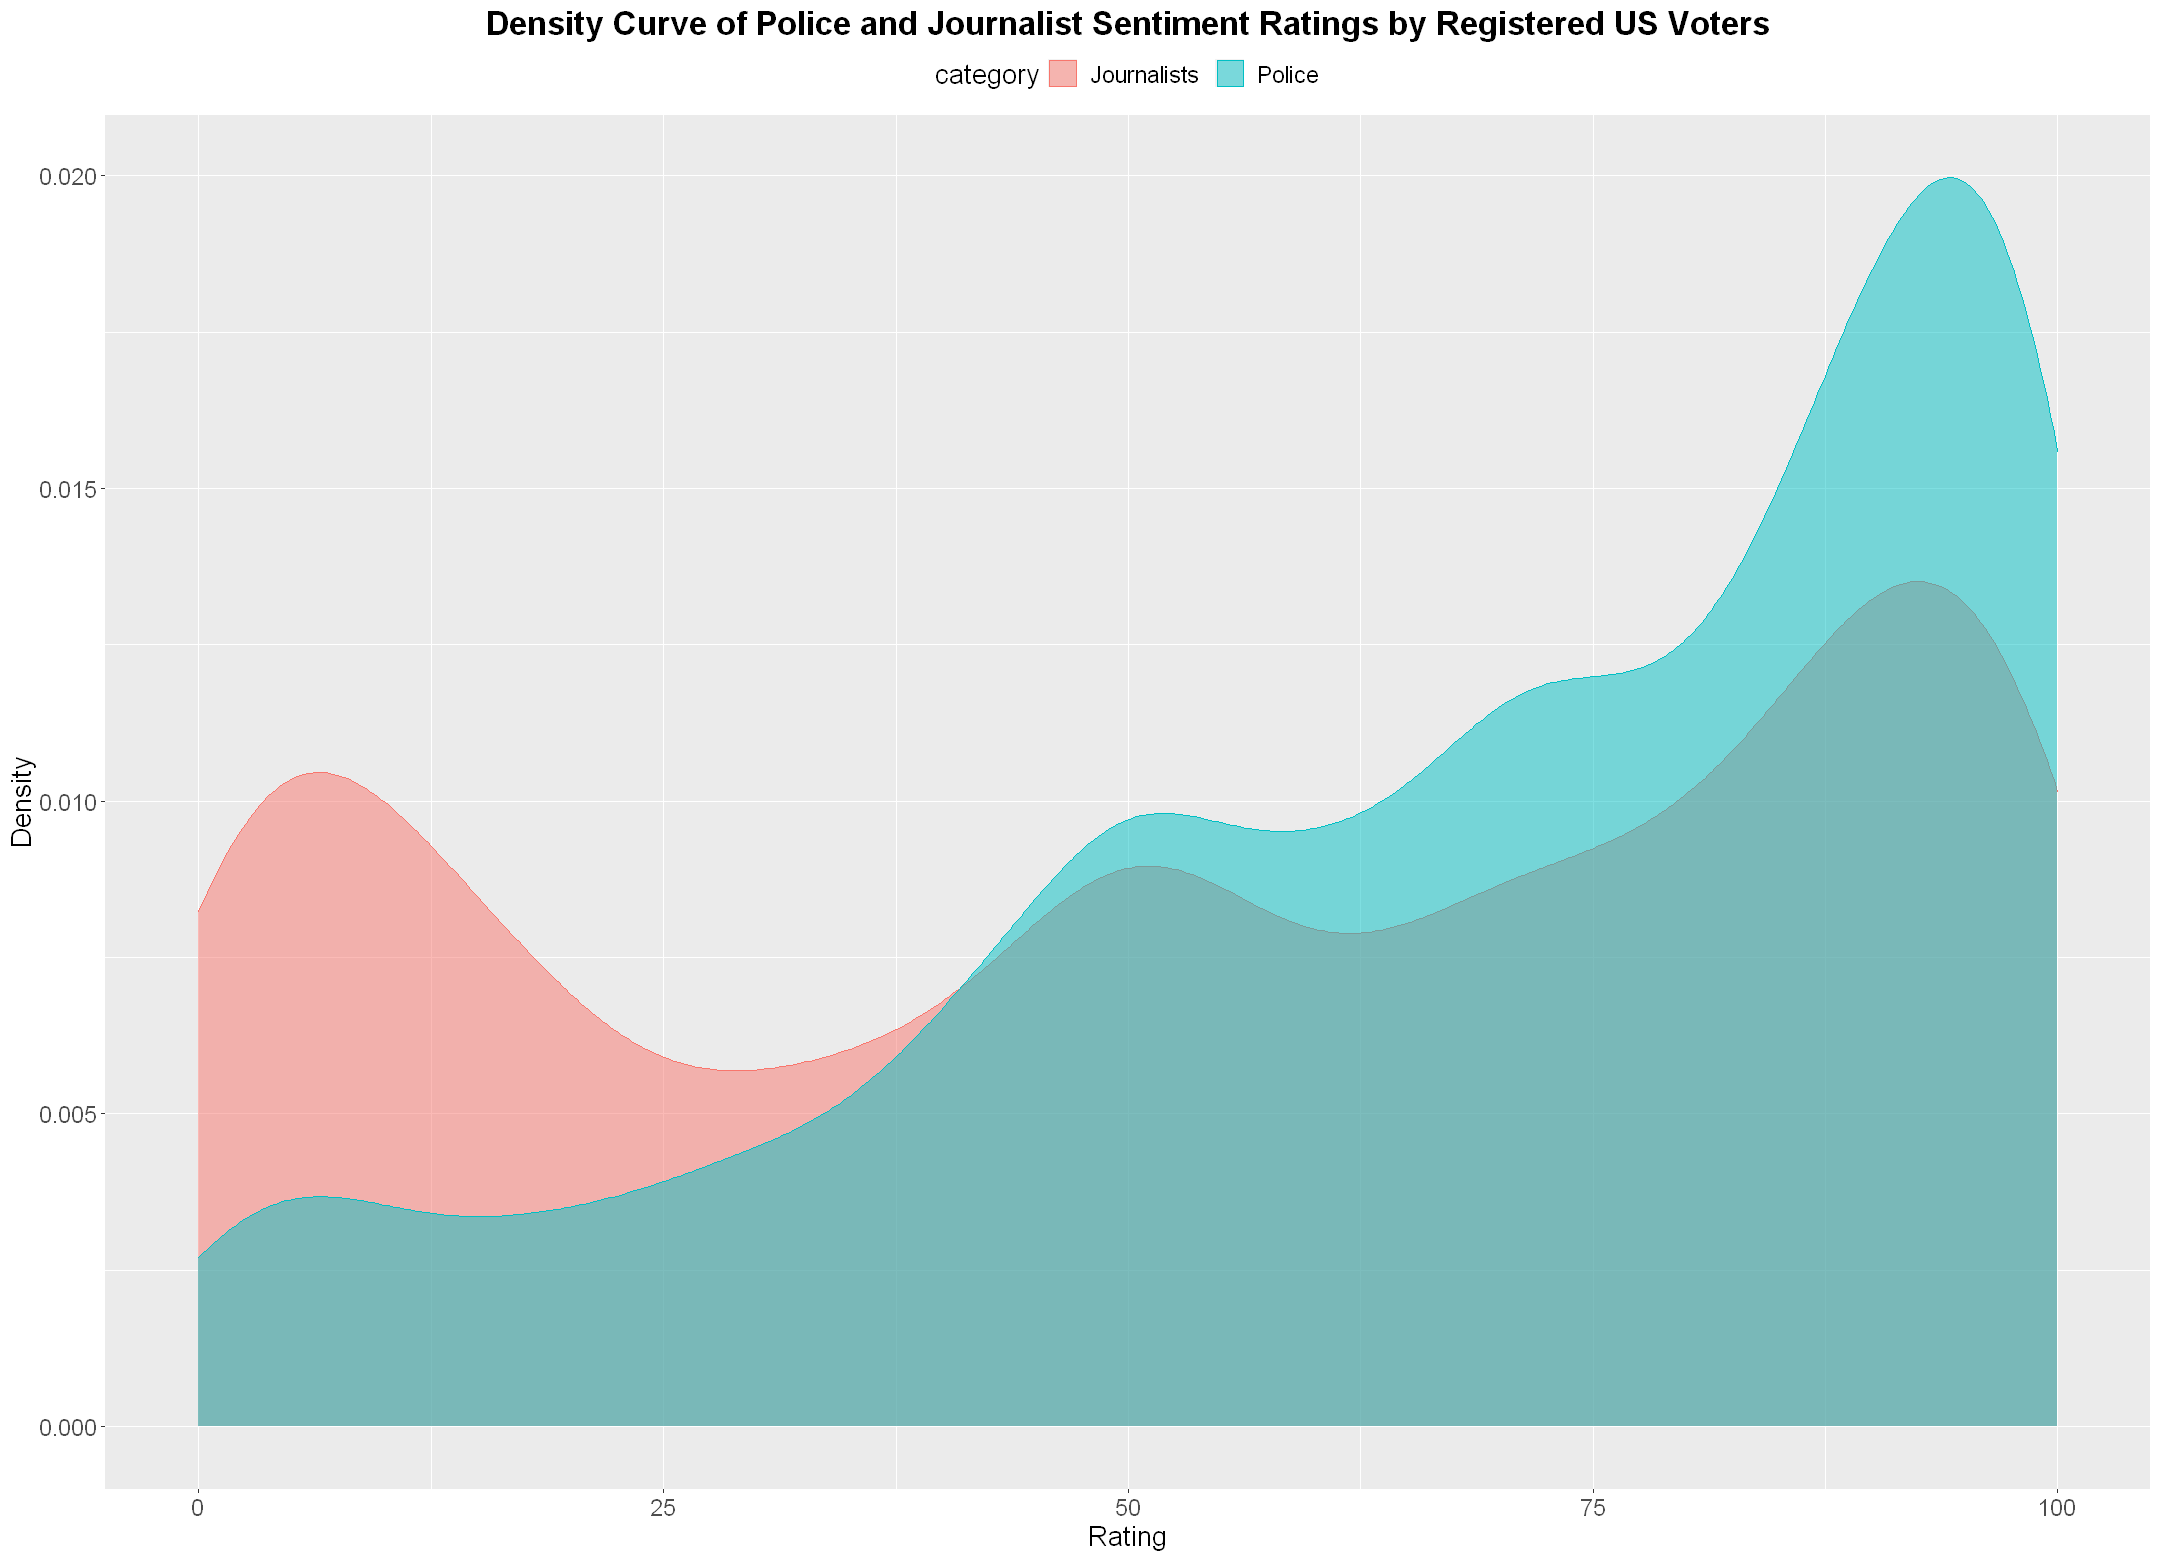

In [11]:
#Step 6: Create a density plot to compare distribution shape agnostic of bin sizes
dens = ggplot(dfc, aes(score, fill = category, color = category)) + 
    geom_density(position = "identity", alpha = .5) +
    labs(title = "Density Curve of Police and Journalist Sentiment Ratings by Registered US Voters", x = "Rating", y = "Density") +
    plot_theme

dens

>The peaks of each density plot helps us identify where ratings are concentrated over the range. Thus, journalist ratings have 3 local peaks without much differentiation. One such interpretation is that respondents were categorically divided in their perception of journalists; low, moderate and high regard. On the contrary, police ratings are left skewed with the peak towards the high end of the range, indicating that a large proportion of respondents held police officers with high regard. 
>
>Although both the histogram and density plot provided quick assessment of the rating distribution between police and journalists, it doesn't provide precise details such as the comparison of its mean, median, and the spread. So, we will review our last plot of our EDA, the notched boxplot.

Warning message:
"Removed 2 rows containing non-finite values (stat_boxplot)."
Warning message:
"Removed 2 rows containing non-finite values (stat_summary)."


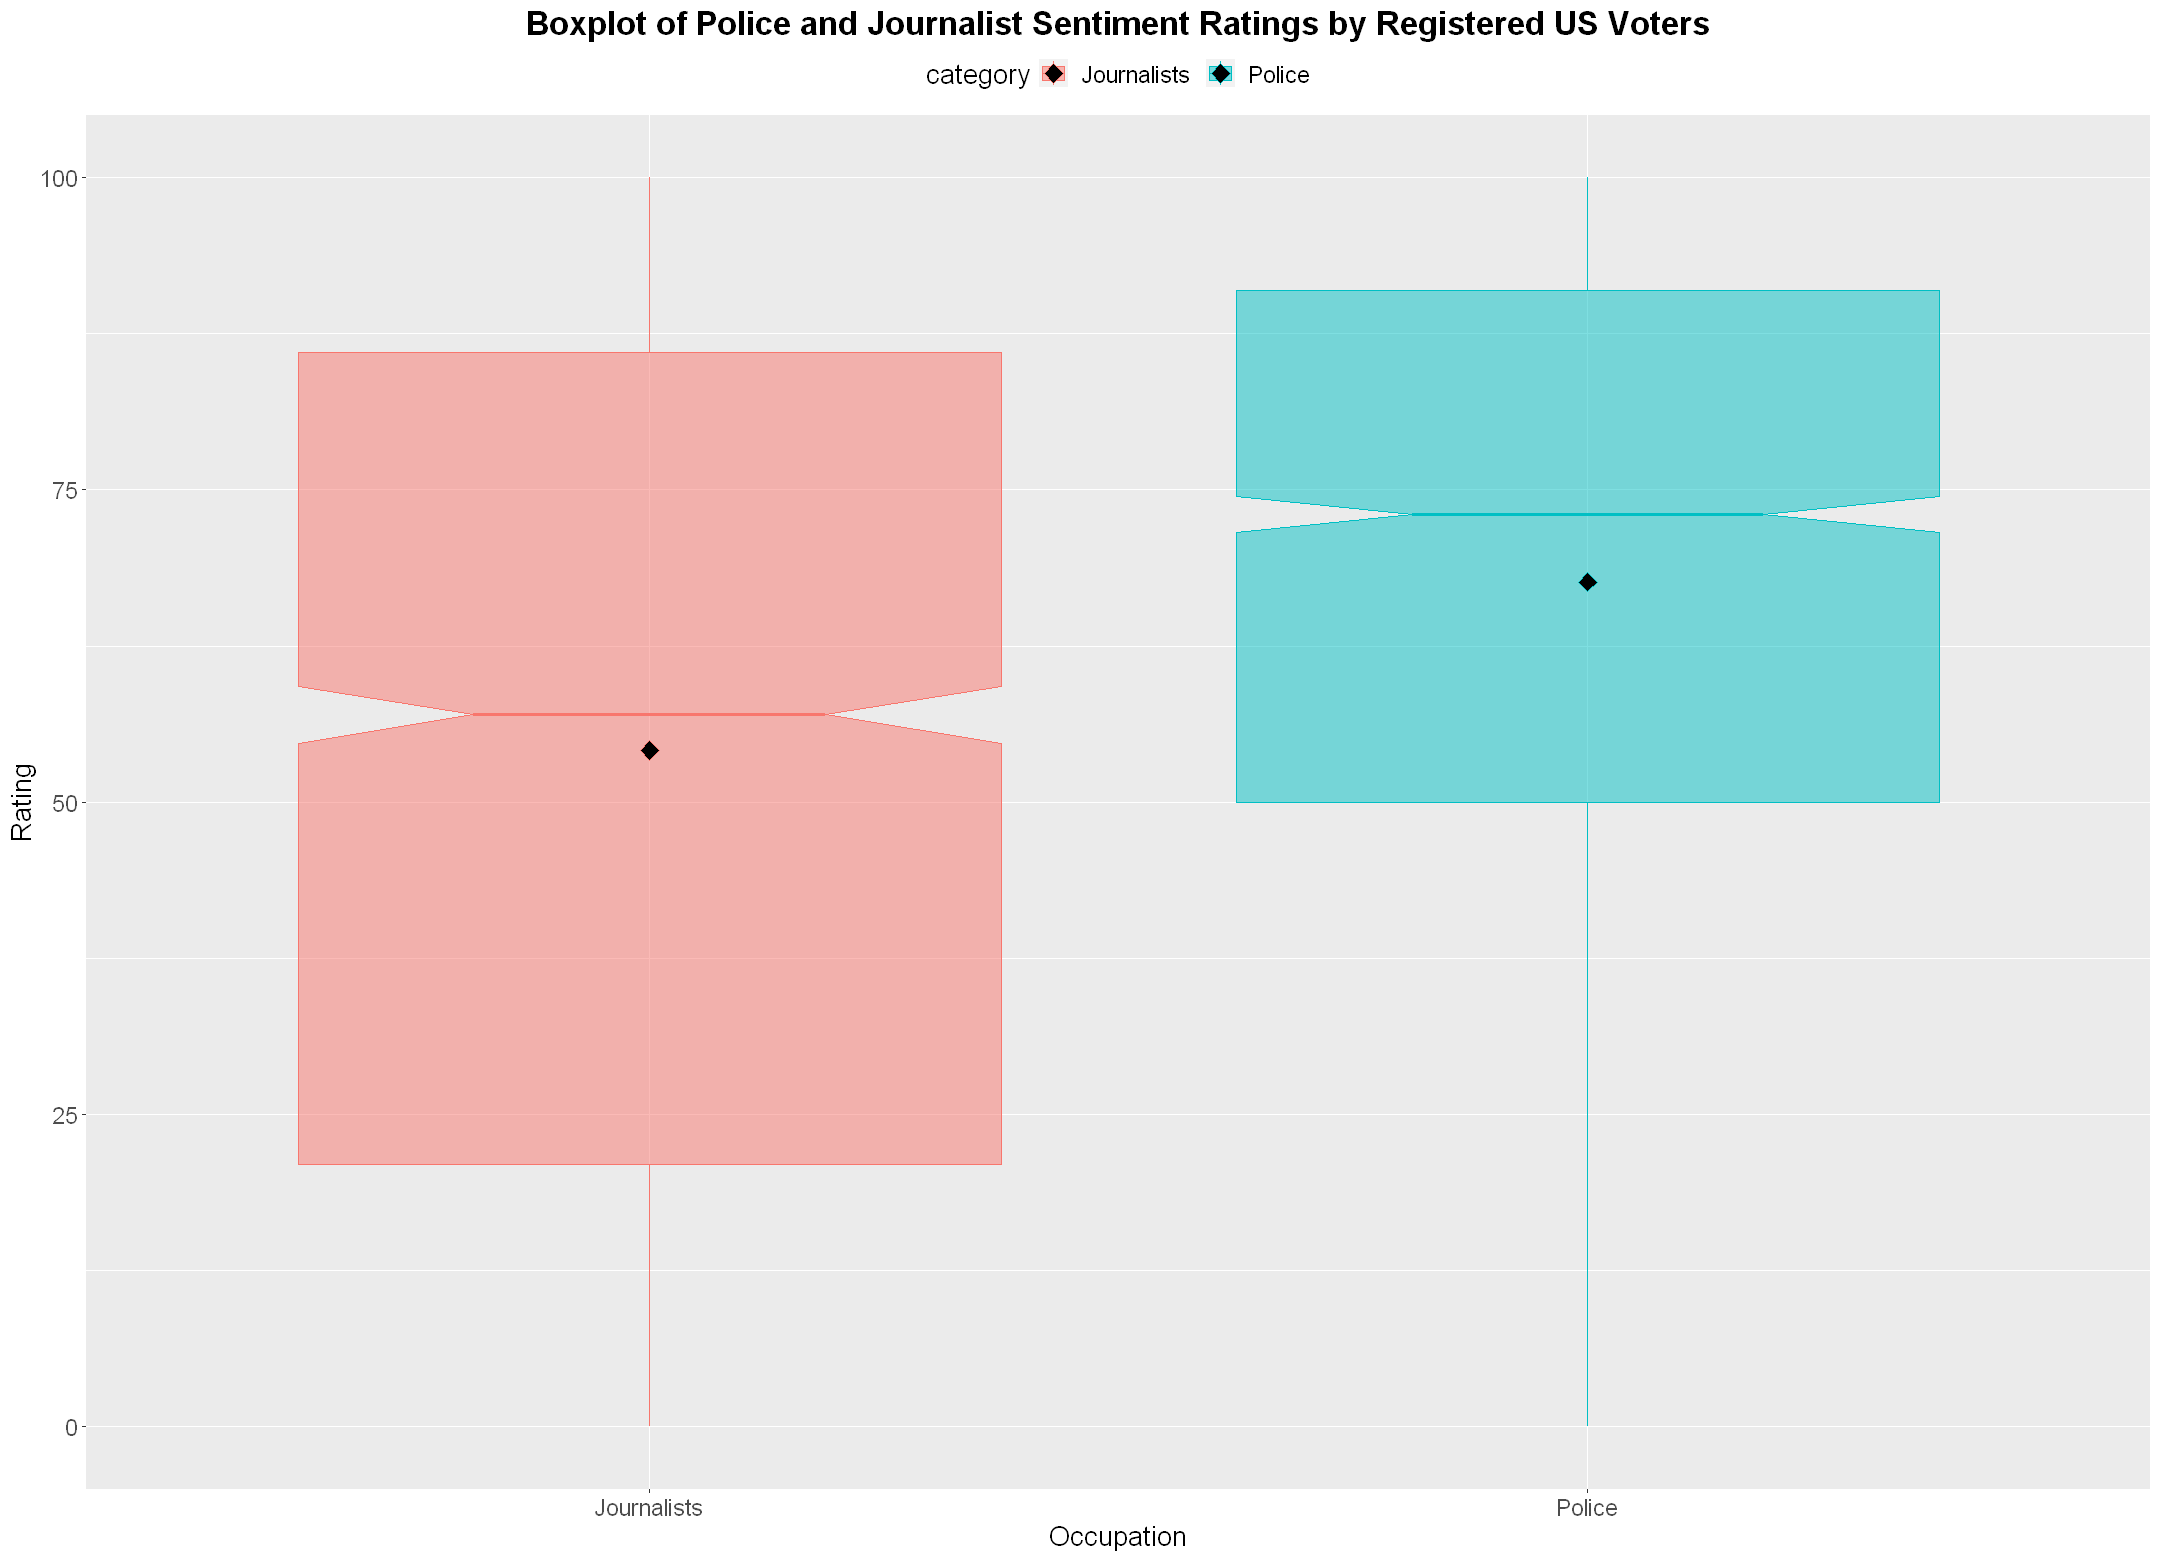

In [12]:
#Step 7: Create notched boxplot to get a more precise reading of the rating score per occupation
box_p = ggplot(dfc, aes(y = score, x = category, fill = category, color = category)) + 
    geom_boxplot(alpha = .5, outlier.color = "black", notch = TRUE) + 
    labs(title = "Boxplot of Police and Journalist Sentiment Ratings by Registered US Voters", x = "Occupation", y = "Rating") + 
    plot_theme

box_p  = box_p + stat_summary(fun = mean, geom = "point", shape = 23, size = 4, fill = "black")
box_p

>The notched boxplot not only conveys a higher concentration of higher scores for police, it also shows the distribution is more right skewed than journalists. Additonally, because the notch (displays the confidence interval around the median which is normally based on the median +/- 1.58*IQR/sqrt(n) and used to compare groups) for police is higher than journalists, there is strong evidence that the medians differ.
>
>Note: The black diamond point represent the mean for each group.

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

>We will apply a non-parametic Wilcoxon Signed Rank test to compare means across both occupations in lieu of a t-test for 2 reasons:
>1. Both variables are from the same sample
>2. The underlying data are ordinal, which is not apprproriate for a t-test, since ordinal data doesn't have a normal distribution. Thus, Means and variances are arbitrary with ordinal data, and hence the t-statistic is also arbitrary. hence, with Likert scale data, the t-test is inappropriate and uninterpretable.
>
>Null hypothesis:
> - $H_{0}: \mu_{police} = \mu_{journalist}$; there is no difference in terms of favorability between police officers and journalists
> 
>Alternative hypothesis:
> - $H_{a}: \mu_{police} \ne \mu_{journalist}$; there is a difference in terms of favorability between police officers and journalists

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [13]:
#Statistical significance
police_v = dfp$score
journalist_v = dfj$score

wilcox.test(police_v, journalist_v, paired = TRUE, conf.int = TRUE)


	Wilcoxon signed rank test with continuity correction

data:  police_v and journalist_v
V = 1241481, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 10.99996 15.99997
sample estimates:
(pseudo)median 
      13.49995 


>To compute the practical significance or the effect size, we will need to obtain the Z score of the Wilcoxon Signed-rank test. Because this is not reported in the default wilcox.test function, we will use the test from the coin package to obtain the Z value. The effect size formula is as follows:
>
> $$r = \frac{Z}{\sqrt{N}}$$
>
> We will also be using the below table to interpret the computed effect size:
>
>| R | Effect Size  |
>|---|---|
>|0.1   | Small  |
>|0.3  | Medium |
>|0.5   | Large   |

In [14]:
#Practical significance 
wilcoxsign_test(police_v ~ journalist_v, paired = TRUE) #using coin package


	Asymptotic Wilcoxon-Pratt Signed-Rank Test

data:  y by x (pos, neg) 
	 stratified by block
Z = 10.739, p-value < 2.2e-16
alternative hypothesis: true mu is not equal to 0


In [15]:
r = 10.739 / sqrt(nrow(dfp))
paste("Effect size:", round(r, 5))

[1] "Effect size: 0.23876"

> #### Q1 Results Interpretation
>- **Statistical significance:** Because the computed p-value (2.2e-16) is very small, we can safely reject the null hypothesis and accept the alternative hypothesis there is a difference in terms of favorability between police officers and journalists
>
>- **Practical significance:** Because the computed effect size (0.23876) is between small and medium, we can conclude that magnitude of the difference between police and journalists are relatively minor. 
>
>In conclusion, while the exploratory data analysis coupled with the Wilcoxon Signed Rank test indicate that we can extrapolate that in general voters have a higher opinion (more respect) of police than they do of journalists. However, given the small effect size, the result should be taken with caution as it has limited practical significance.

## Question 2: Are Republican voters older or younger than Democratic voters?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

>Our goal is to compare the mean age of Republican voters against Democratic voters and assess if the difference is statisically significant or not. In order to accomplish this, we must operationalize 2 variables of interest:
>- Voter's age: According to the ANES user code book, there is a **birthyr** variable used to capture the birthyear of each respondent as part the profile data. Given that the study was conducted in December 2018, we can calculate a new variable called age by subtracting 'birthyr' from 2018. Additonally, we will also validate each voter's age to make sure the minimum is 18, since it's the minimum voting age in the United States.
>-Party affliation: There are a 2 types of data that we can use to determine party affliation: 
>    1. Voting record such as senate18p (For the US senate, what was the party affliation of the candidate you voted for?), gov18p (For the governor of your state, what was the the party affliation of the candidate you voted for?) and vote16 (In the 2016 presidential election, who did you vote for?) 
>    2. Self-identified through variables such as **pid1d** or **pid1r** (Generally speaking, do you usually think of yourself as a Democrat, a Republican or another political affliation?). Both variables prompt the same question, but is dynamically selected with main the difference in which party (Democrat or Republican) is mentioned first in the question as well as in the response. The coding also differs (1 maps to Democrat in pid1d while 2 maps to Democrat in pid1r). Thus, we need to analyze and combine both variables to operationalize the responses in our analysis. 
>
> While it may be intuitive to use historical voting records to determine party affliation, but just because a voter voted for a Republican candidate in 2016 or 2018 does not provide enough data points to determine them as a "Republican" voter, especially when we encounter differences in voting pattern in different election years and at different election levels. Thus, to avoid having to make potentially errorneous judgement calls, we decided to use self-identification to determine party affliation.

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

> #### Age
>
>- Data: Subtract **birthyr** from 2018.
>- Sanity check: Minimum value should be 18, since it's the minimum voting age in the US.
>
> #### Political Party
>- Data: Since the question had two formats, which stated either "Democrat" or "Republican" first in the question statement, we need to look at both fields "pid1d" and "pid1r."
>- Sanity check: We check to see that only one of either "pid1d" or "pid1r" was answered (i.e. a respondent should not have a 1 or 2 in both columns). 

In [16]:
#Data transformation from pid1r responses
df_r = select(A, birthyr, pid1r) #pulls birthyr and pid1r values
df_r$age = 2018 - A$birthyr #computes age
df_r$pid1r = replace(df_r$pid1r, A$pid1r == 1, "Republican") #replaces 1 with Republican
df_r$pid1r = replace(df_r$pid1r, A$pid1r == 2, "Democrat") #replaces 2 with Democrat
df_r = df_r %>% filter(pid1r == "Republican" | pid1r == "Democrat") #filter out all non Democrat and Republican values in pid1r
names(df_r)[names(df_r) == "pid1r"] = "party" #renames pid1r with party
df_r = subset(df_r, select = -c(birthyr)) #drop birthyr since it's no longer needed
head(df_r)
nrow(df_r)

,party,age
,<chr>,<dbl>
1,Democrat,29
2,Republican,26
3,Democrat,56
4,Democrat,40
5,Democrat,67
6,Republican,65


[1] 635

In [17]:
#Data transformation from pid1d responses
df_d = select(A, birthyr, pid1d) #pulls birthyr and pid1d values
df_d$age = 2018 - A$birthyr #computes age
df_d$pid1d = replace(df_d$pid1d, A$pid1d == 2, "Republican") #replaces 2 with Republican
df_d$pid1d = replace(df_d$pid1d, A$pid1d == 1, "Democrat") #replaces 1 with Democrat
df_d = df_d %>% filter(pid1d == "Republican" | pid1d == "Democrat") #filter out all non Democrat and Republican values in pid1d
names(df_d)[names(df_d) == "pid1d"] = "party" #renames pid1d with party
df_d = subset(df_d, select = -c(birthyr)) #drop birthyr since it's no longer needed
head(df_d)
nrow(df_d)

,party,age
,<chr>,<dbl>
1,Republican,32
2,Democrat,61
3,Democrat,50
4,Republican,31
5,Democrat,66
6,Democrat,38


[1] 681

In [18]:
#combine df_r and df_d
df_p = rbind(df_d, df_r)
nrow(df_p)

#create vector for each party
repub = filter(df_p, party == "Republican")
demo = filter(df_p, party == "Democrat")

nrow(repub) #sanity check that we have the correct total number of self-identified Republicans
nrow(demo)  #sanity check that we have the correct total number of self-identified Democrats
nrow(repub) + nrow(demo) == nrow(df_p)

[1] 1316

[1] 664

[1] 652

[1] TRUE

In [19]:
#computes the mean and standard deviation of age by party
mu2 = ddply(df_p, "party", summarize, mean_age = mean(age, na.rm = TRUE), sd_age = sd(age, na.rm = TRUE))
mu2

demo_mean = mu2[1,2]
repub_mean = mu2[2,2]

party,mean_age,sd_age
<chr>,<dbl>,<dbl>
Democrat,53.42025,16.10625
Republican,52.74548,16.60144


>Initial review of the mean and standard deviation of age doesn't not seem to suggest there are major differences between the 2 parties.
Next, we will provide a similar set of visualizations as the previous question to visually inspect the distribution.

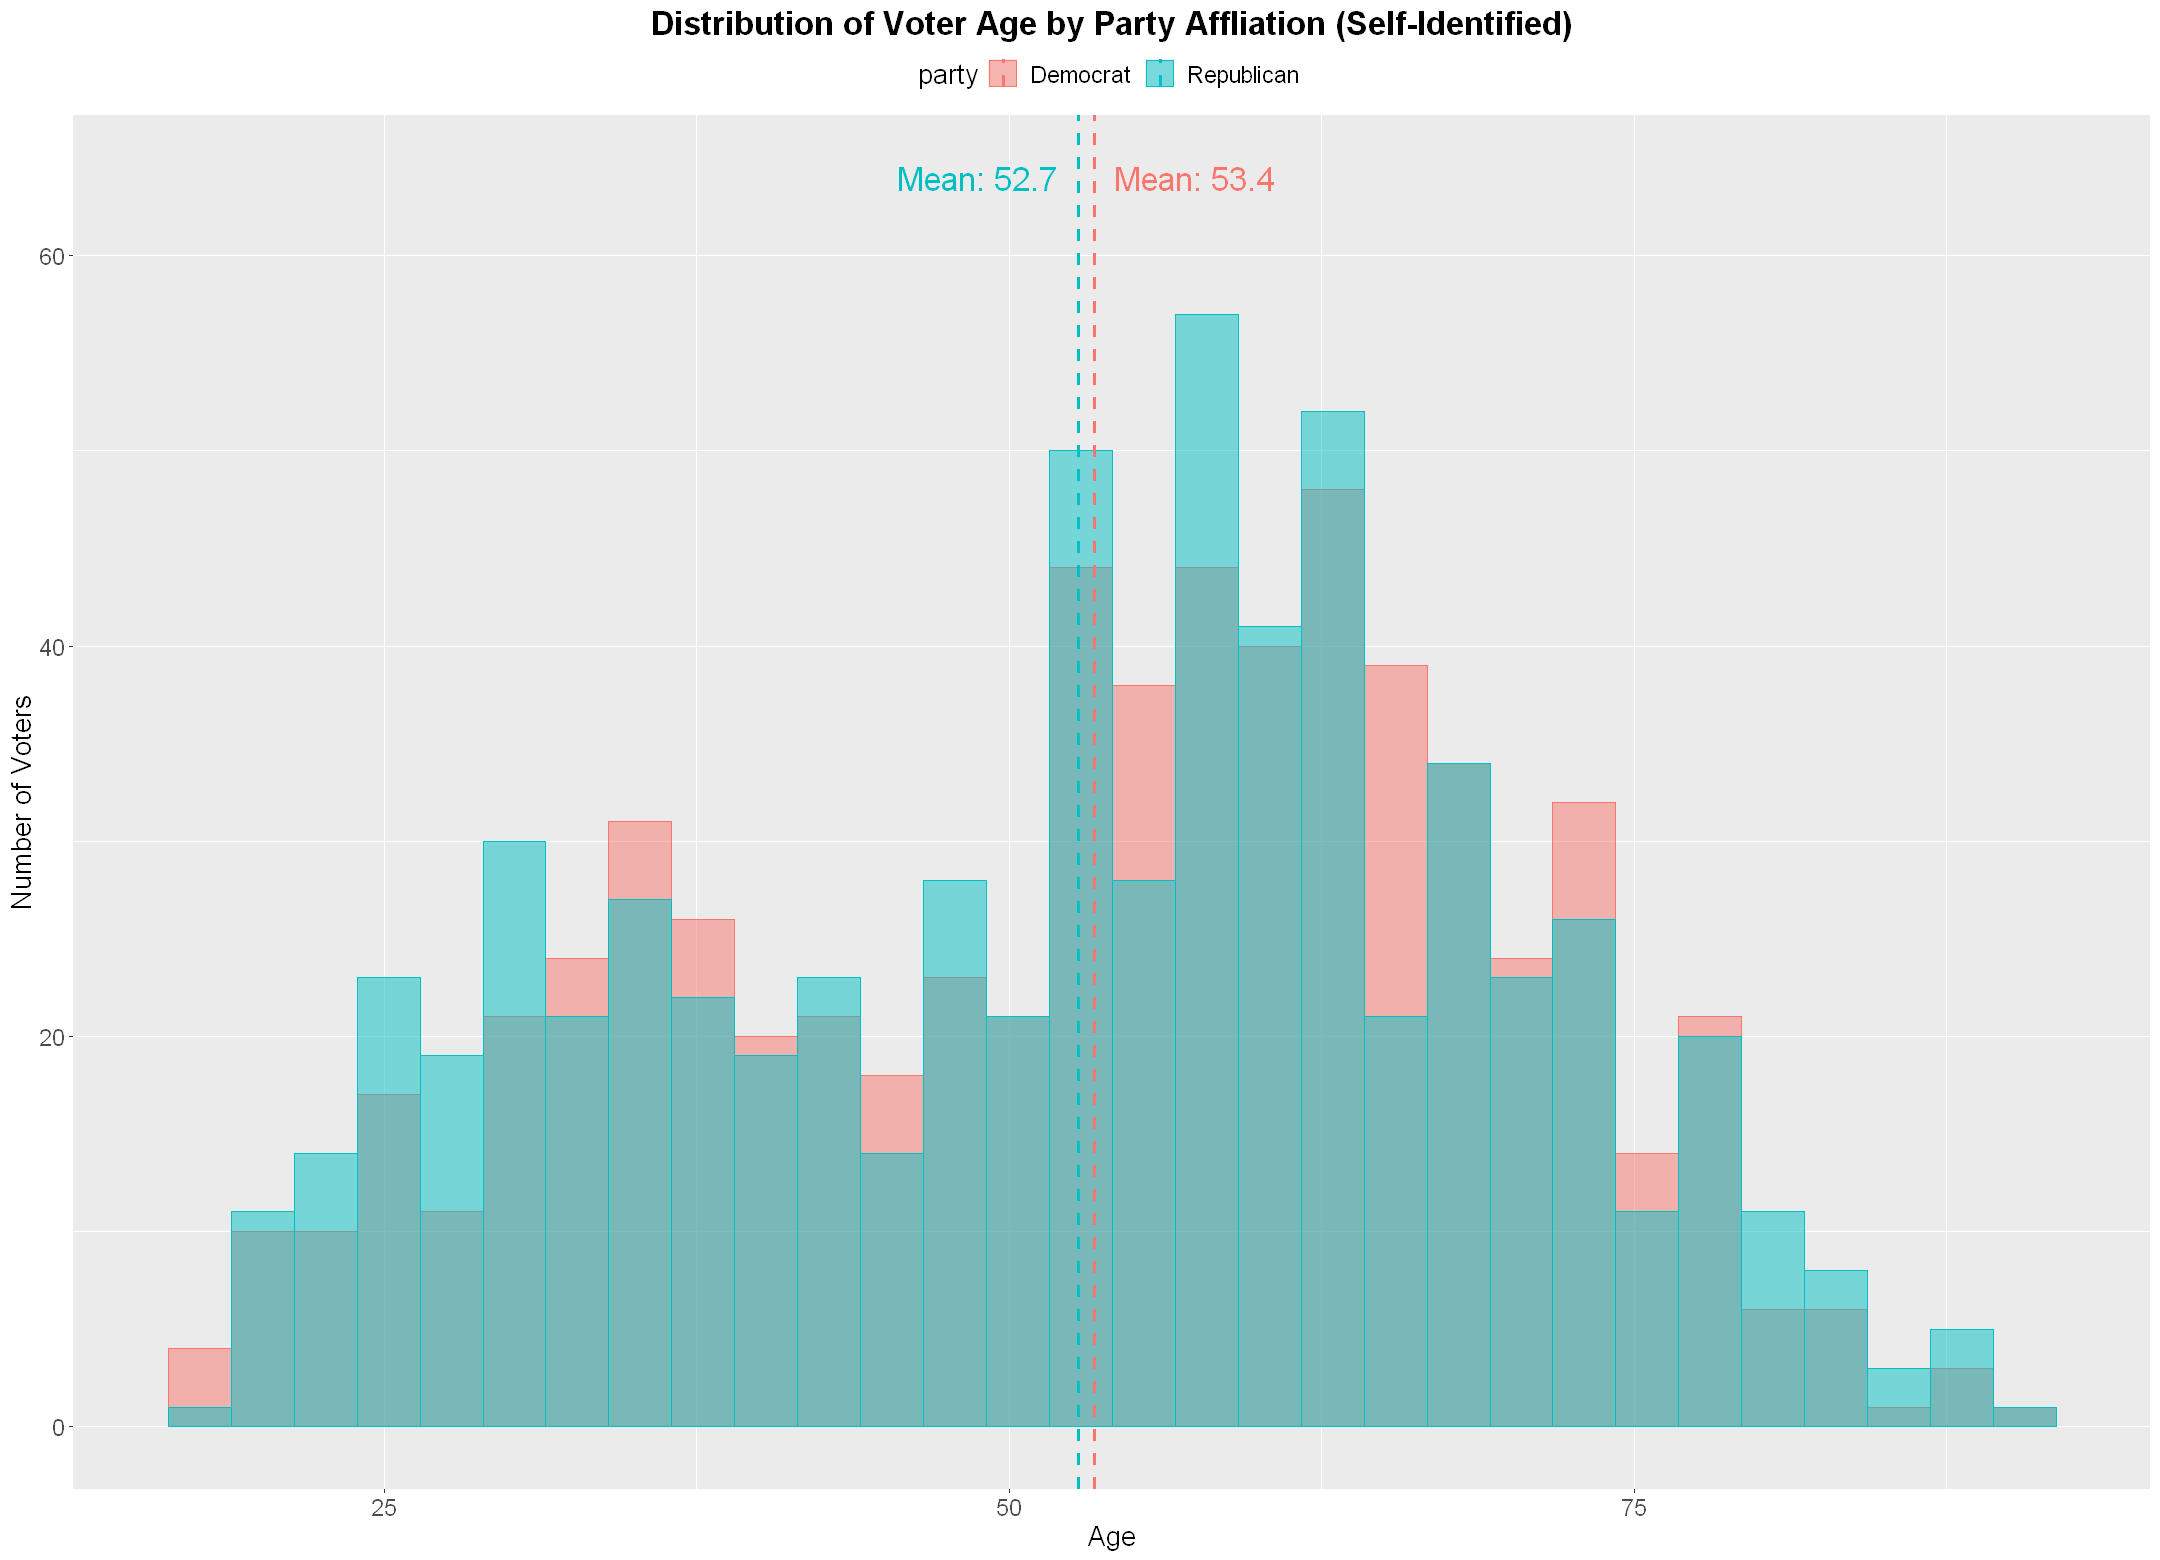

In [20]:
#Histogram
#options(repr.plot.width = 18, repr.plot.height = 13)

histo2 = ggplot(df_p, aes(age, fill = party, color = party)) + 
    geom_histogram(position = "identity", alpha = .5, bins = 30) +
    geom_vline(data = mu2, aes(xintercept = mean_age, color = party), linetype = "dashed", size = 1) +
    annotate(geom = "text", x = demo_mean + 4, y = 64, label = paste("Mean:", round(demo_mean, 1)), color = "#F8766D", size = 7) +
    annotate(geom = "text", x = repub_mean - 4, y = 64, label = paste("Mean:", round(repub_mean, 1)), color = "#00BFC4", size = 7 ) +
    labs(title = "Distribution of Voter Age by Party Affliation (Self-Identified)", x = "Age", y = "Number of Voters") + 
    plot_theme

histo2

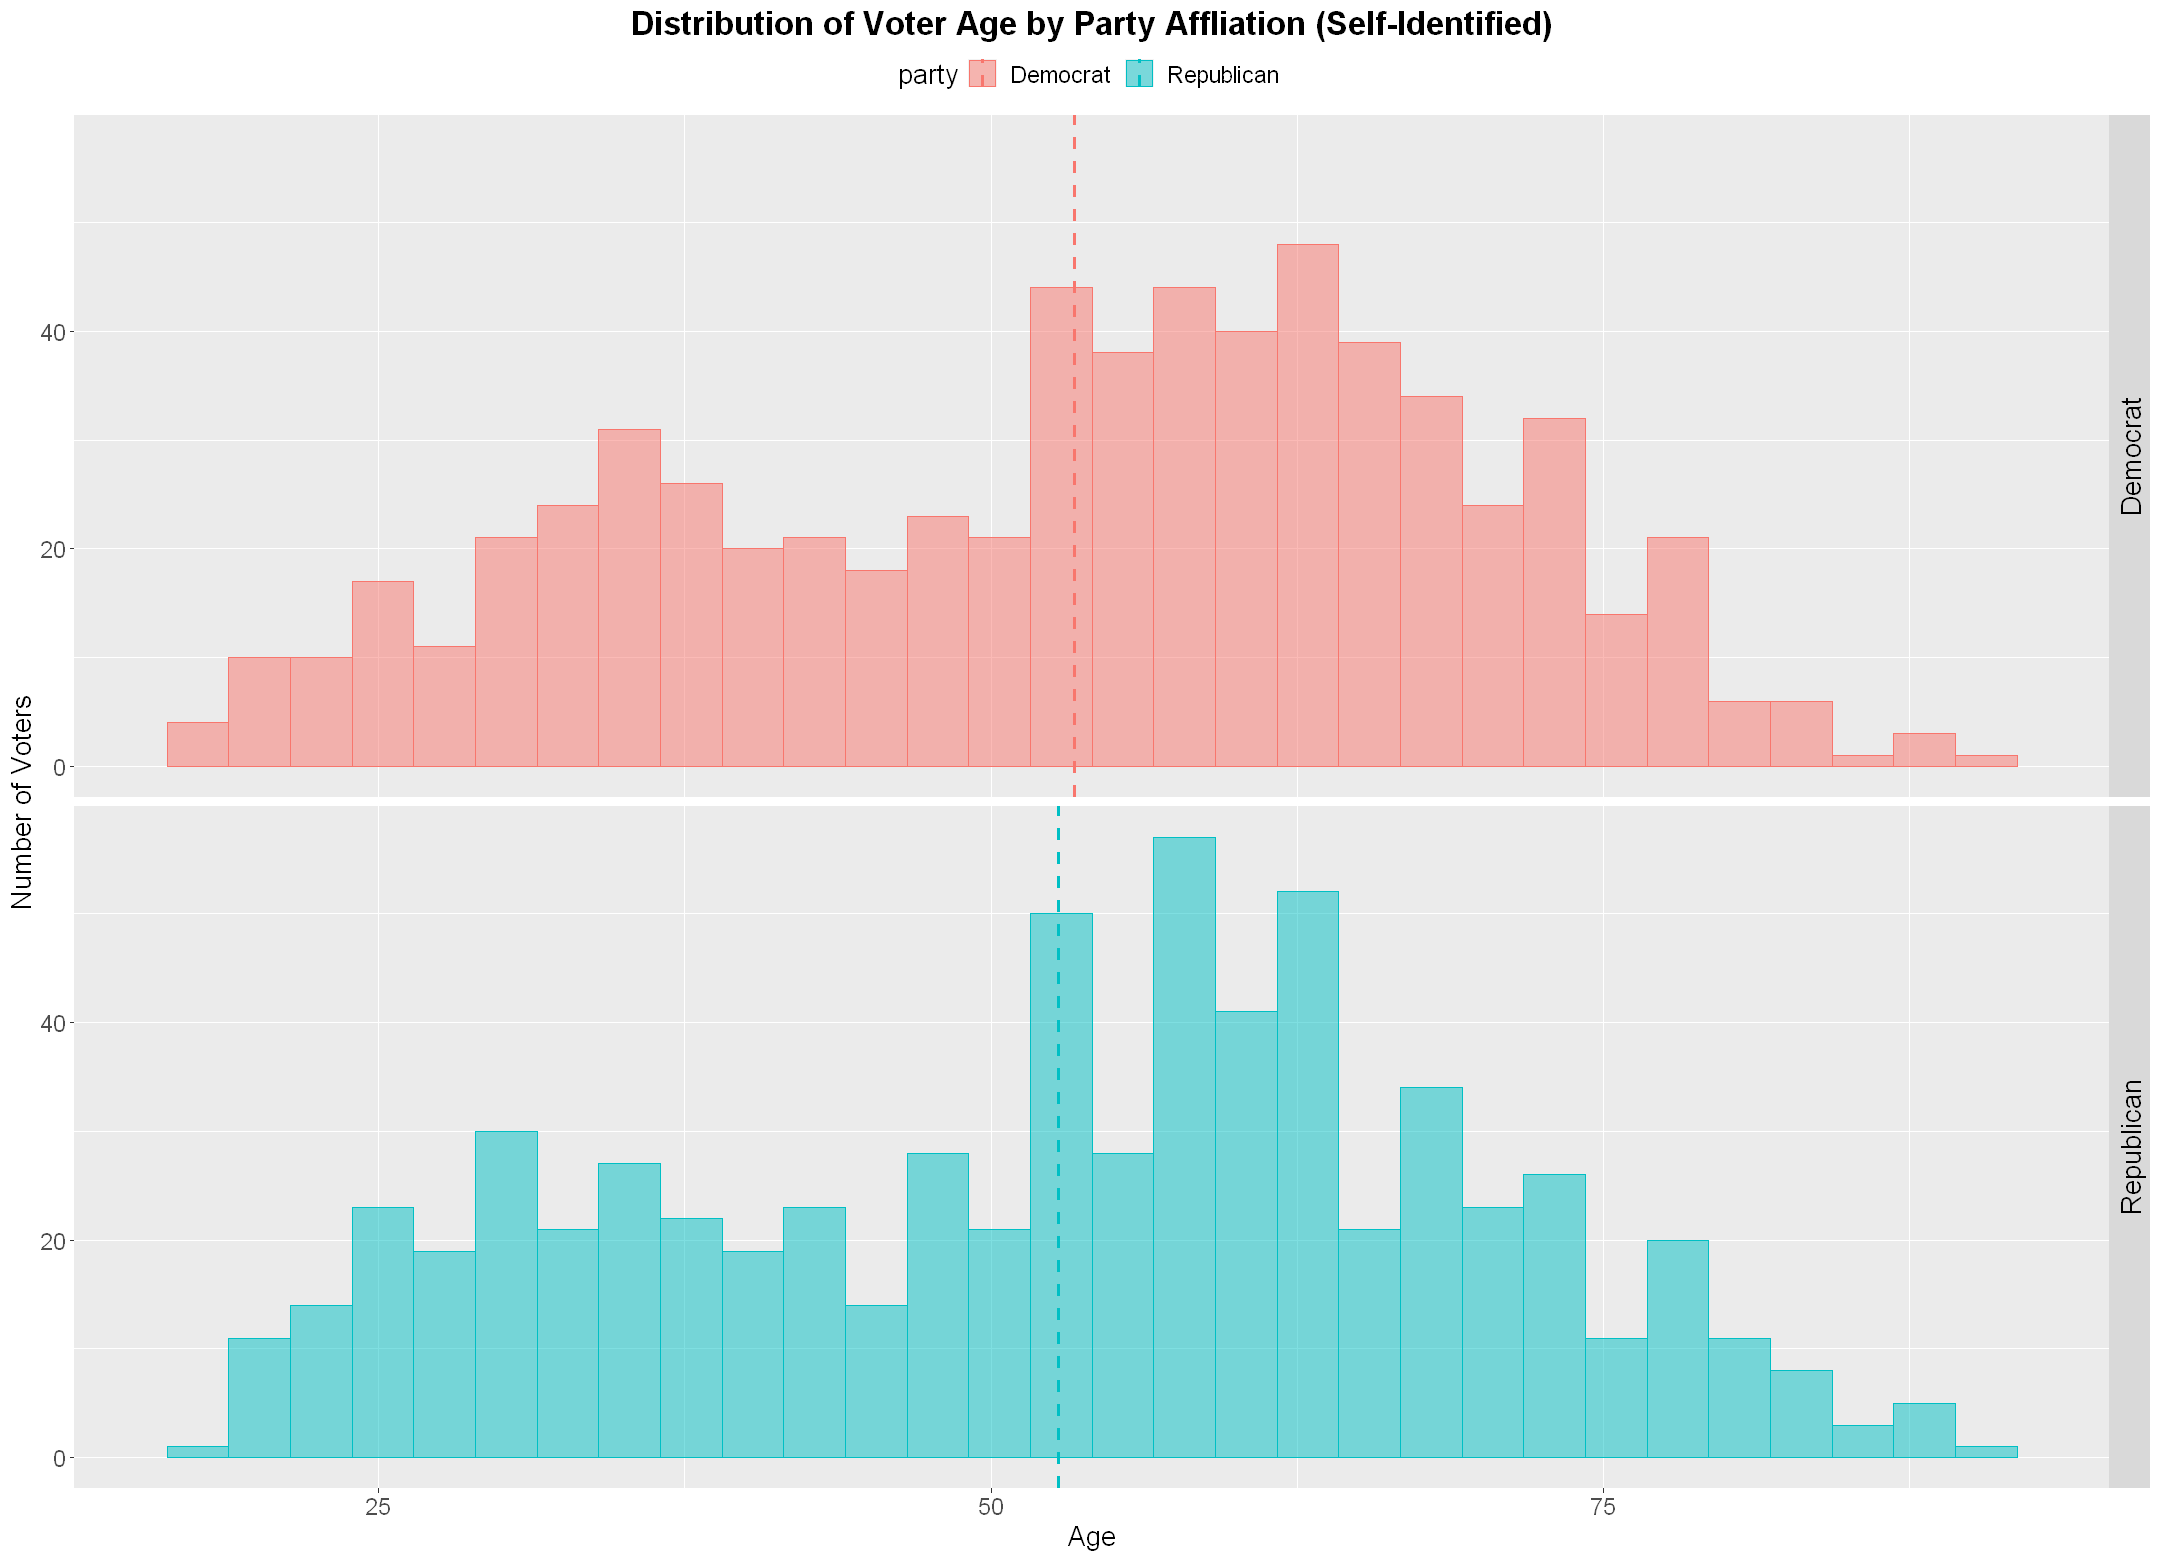

In [21]:
#Facet histogram: Alternative to overlaid histogram
histo_f = ggplot(df_p, aes(age, fill = party, color = party)) + 
    geom_histogram(position = "identity", alpha = .5, bins = 30) +
    geom_vline(data = mu2, aes(xintercept = mean_age, color = party), linetype = "dashed", size = 1) +
    labs(title = "Distribution of Voter Age by Party Affliation (Self-Identified)", x = "Age", y = "Number of Voters") + 
    facet_grid(party ~ .) +
    plot_theme

histo_f

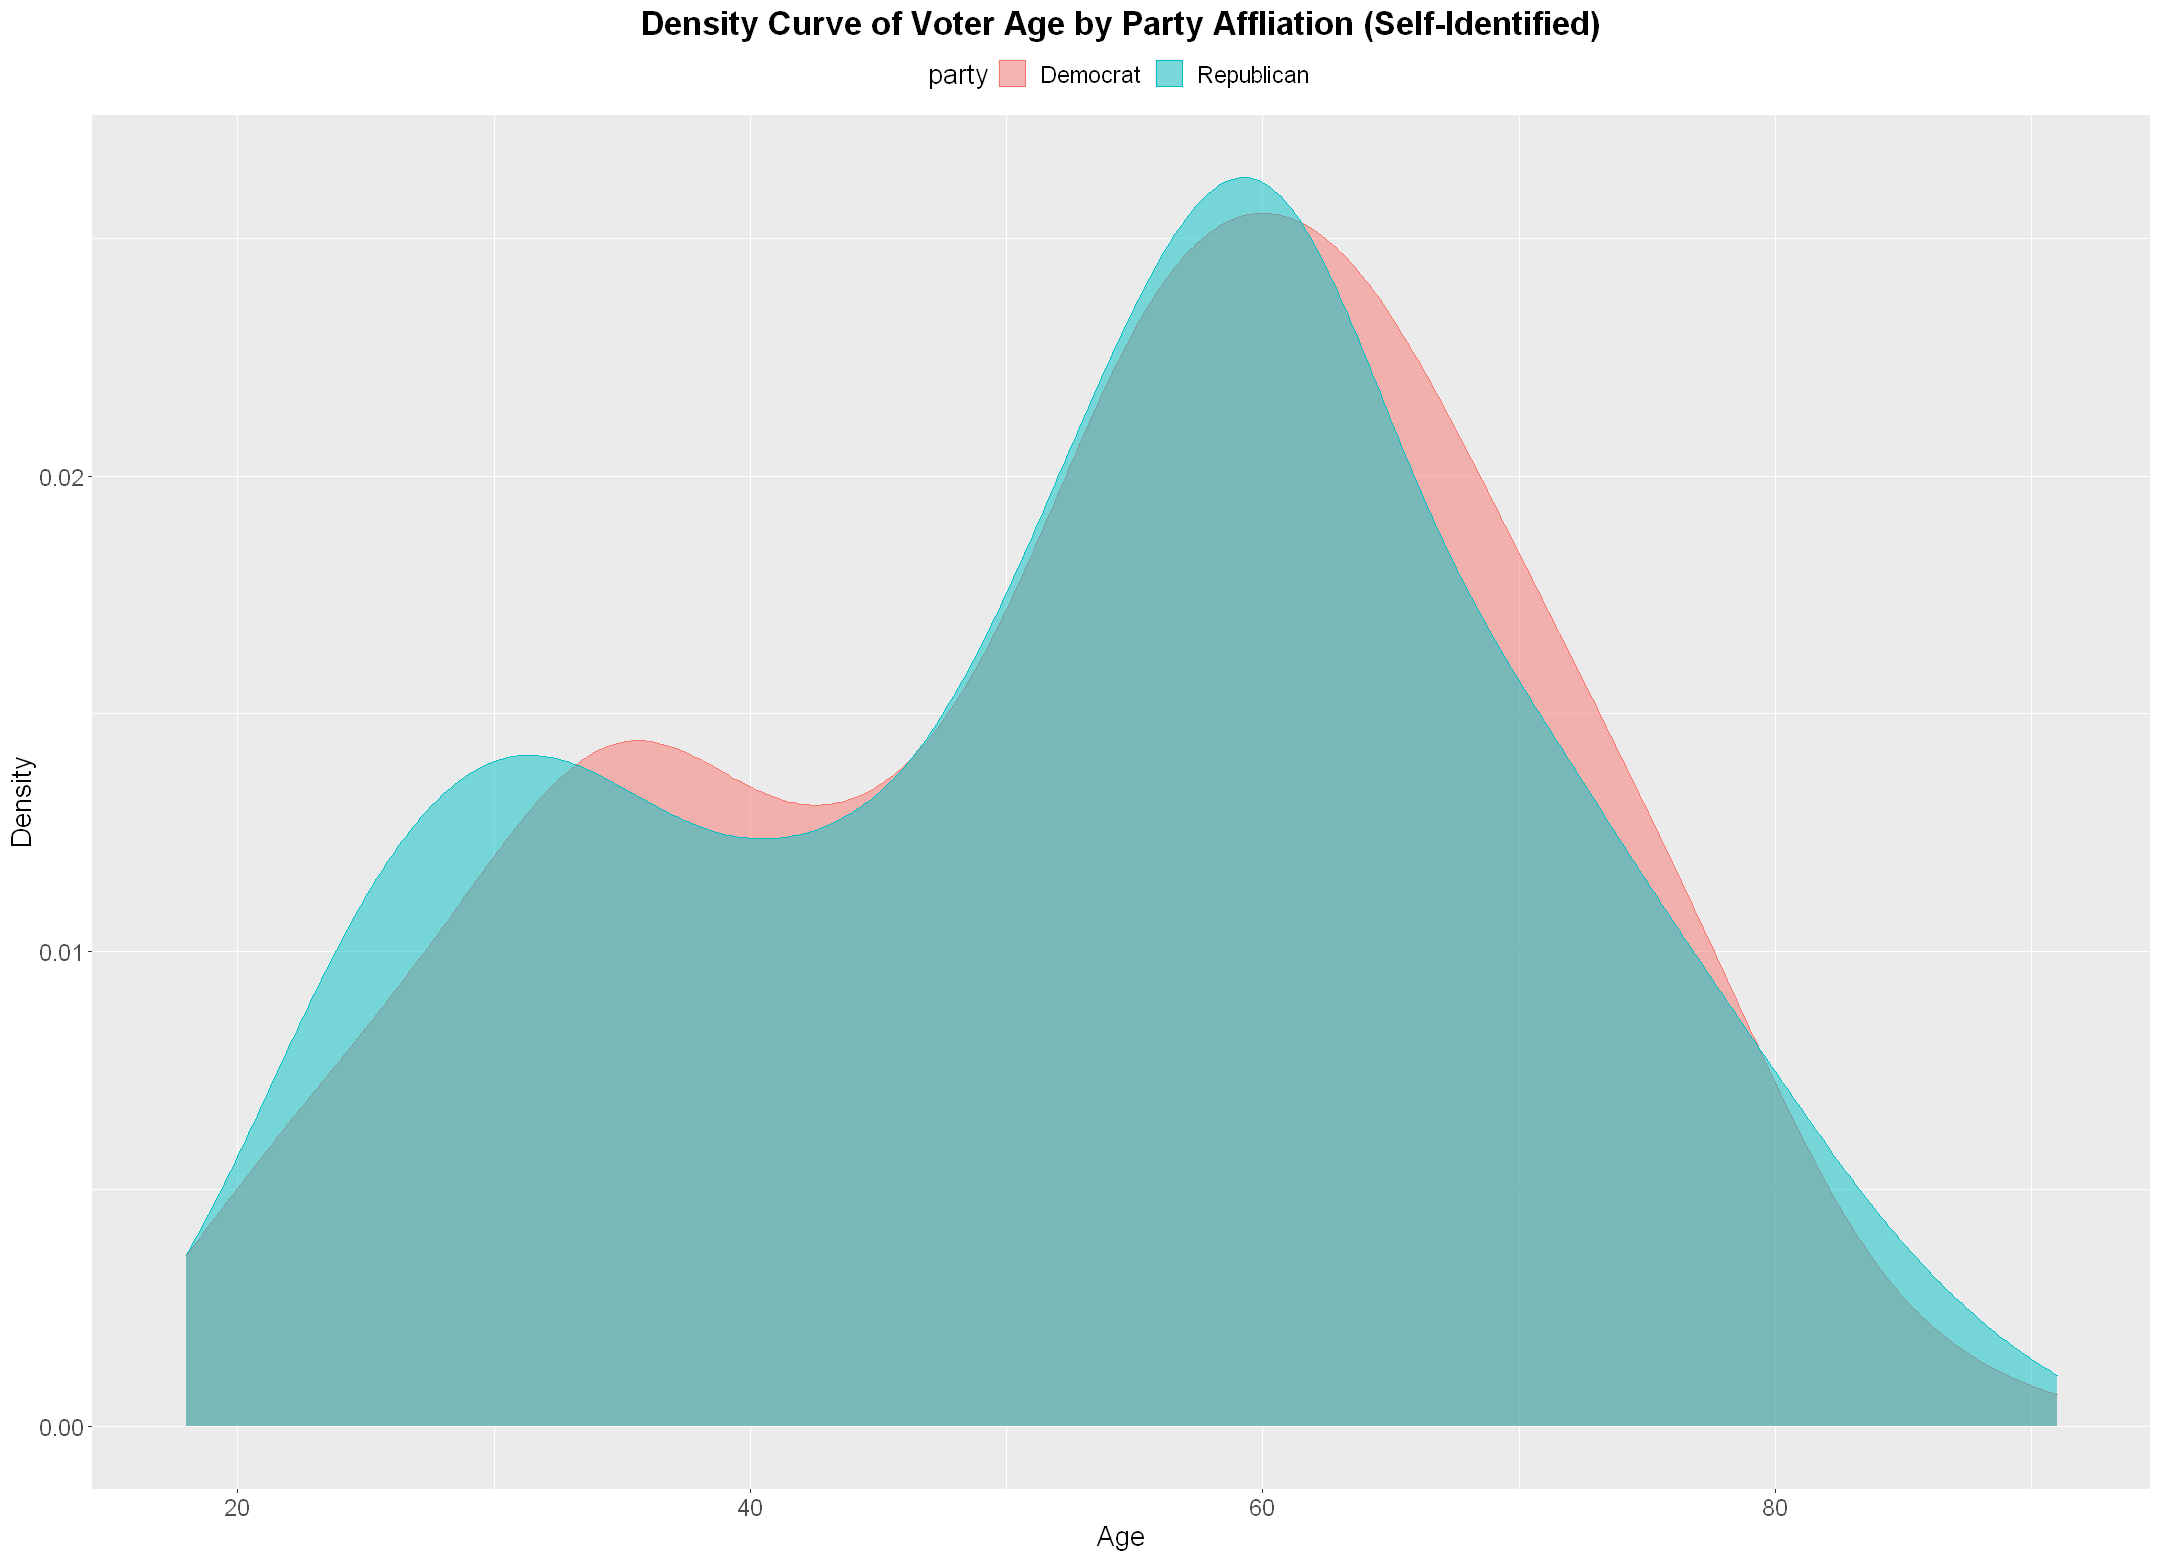

In [22]:
#Density plot
dens2 = ggplot(df_p, aes(age, fill = party, color = party)) + 
    geom_density(position = "identity", alpha = .5) +
    labs(title = "Density Curve of Voter Age by Party Affliation (Self-Identified)", x = "Age", y = "Density") +
    plot_theme

dens2

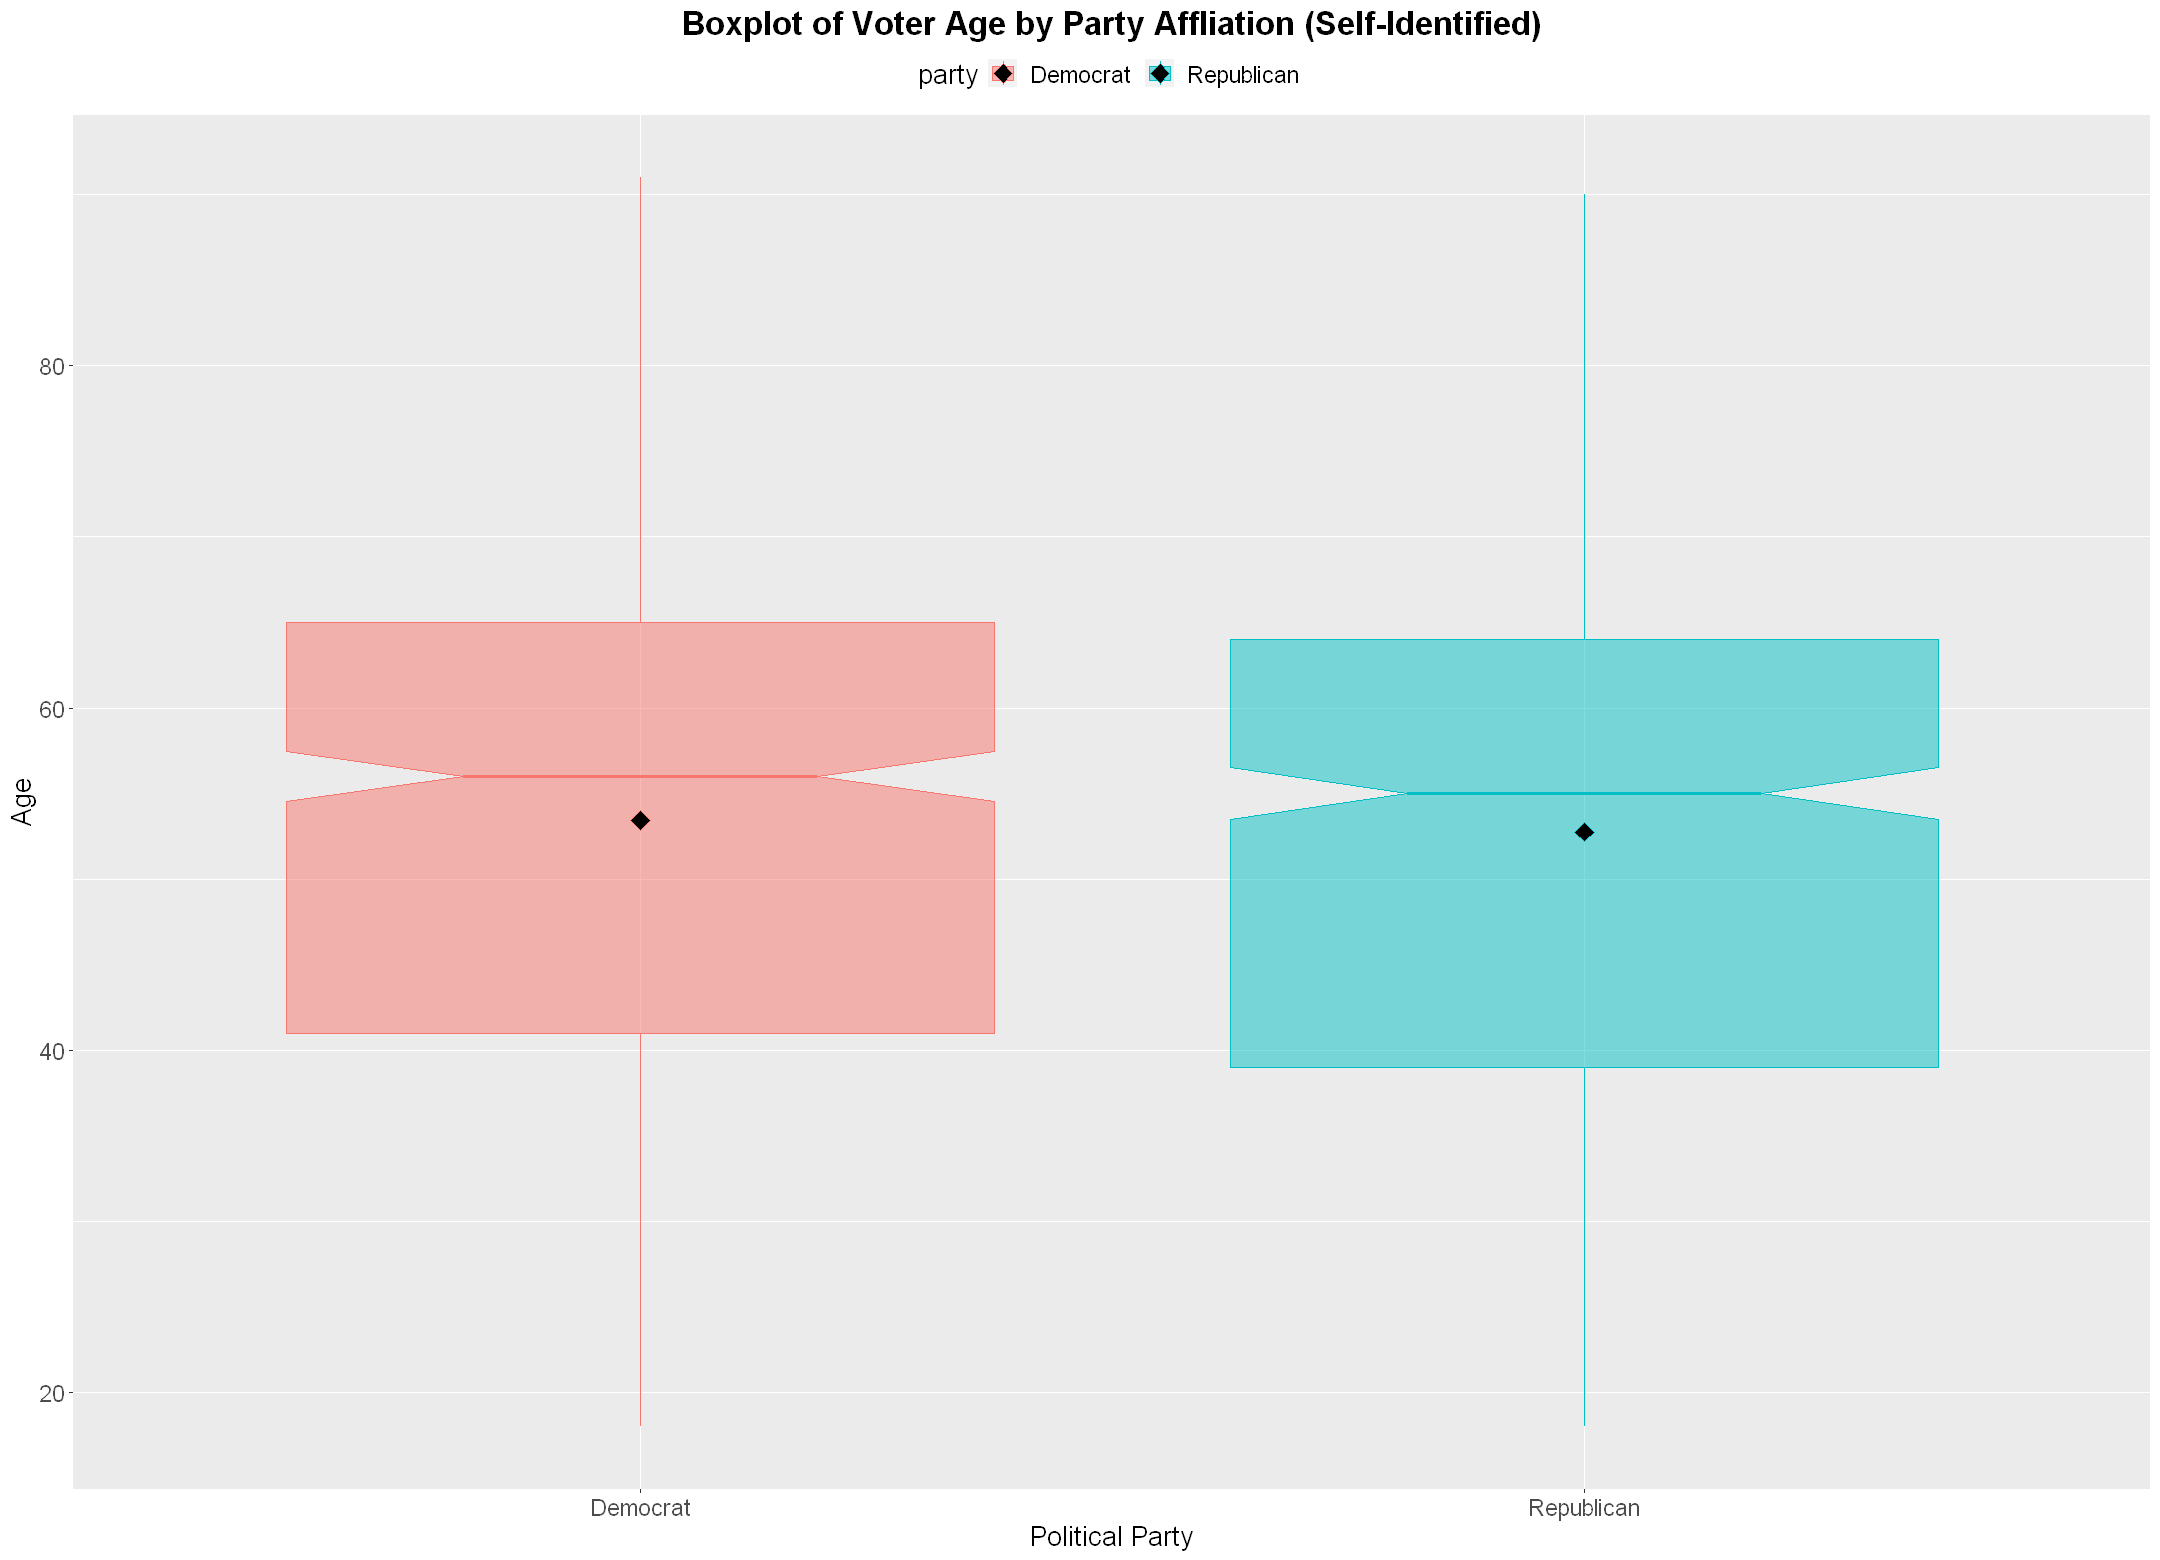

In [23]:
#Notched boxplot
box_p2 = ggplot(df_p, aes(y = age, x = party, fill = party, color = party)) + 
    geom_boxplot(alpha = .5, outlier.color = "black", notch = TRUE) + 
    labs(title = "Boxplot of Voter Age by Party Affliation (Self-Identified)", x = "Political Party", y = "Age") + 
    plot_theme

box_p2  = box_p2 + stat_summary(fun = mean, geom = "point", shape = 23, size = 4, fill = "black")
box_p2

>From the histogram, density plot and boxplot, the distribution of voter age between Democrats and Republicans exhibit similar shape with the average age of Democrat voters slightly higher than Republican voters. Additionally, the mean, median, and range of of voter age between the 2 parties are similar.

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

> We believe a two sided, two sample T-test is appropriate for 5 reasons:
>
>1. We're interested in knowing whether there is a difference between 2 populations (self-professed Republicans and Democrats)
>2. Each observation is a random sample (independently and identically distributed) from the population meaning that each observation is independent of one another
>3. Both distribution shows signs of normality
>4. We have over 700 observations for each party, well over the n > 30 minimum requirement to invoke the Central Limit Theorem
>5. The dependent variable, age, is continious
>
>Thus, we will conduct an independent two sample T-test to determine if the difference in mean voter age between self-identified Republicans and Democrats are statistically significant or not.
>
>Null hypothesis:
> - $H_{0}: \mu_{DemocratAge} = \mu_{RepublicanAge}$; there is no difference in mean age of Democrats and Republicans
> 
>Alternative hypothesis:
> - $H_{a}: \mu_{DemocratAge} \ne \mu_{DemocratAge}$; there is no difference in mean age of Democrats and Republicans

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [24]:
#Two sample T-test to assess statistical significance
t.test(age ~ party, data = df_p)


	Welch Two Sample t-test

data:  age by party
t = 0.74838, df = 1313.8, p-value = 0.4544
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.094035  2.443561
sample estimates:
  mean in group Democrat mean in group Republican 
                53.42025                 52.74548 


>To assess for practical significance or the effect size, we will use Cohen's d, since the 2 groups have similar standard deviations and similar samples.
>
> We will also be using the below table to interpret the computed effect size of the d-value:
>
>| d | Effect Size  |
>|---|---|
>|0.2   | Small  |
>|0.5  | Medium |
>|0.8   | Large   |

In [25]:
#Cohen's d to assess practical significance
cohen.d(age ~ party, data = df_p)


Cohen's d

d estimate: 0.0412498 (negligible)
95 percent confidence interval:
      lower       upper 
-0.06692214  0.14942173 


> #### Q2 Results Interpretation
>- **Statistical significance:** Because the two sample T-test's p-value (0.1941) is bigger than .05, we cannot reject the null hypothesis (there is no difference in mean age of Democrats and Republicans) 
>
>- **Practical significance:** Because the computed d-value is 0.06783931, the practical significance is negligible. Thus, we can conclude that magnitude of the difference between the age of Democrats and Replublicans are minor. 
>
>In conclusion, the exploratory data analysis coupled with the T-test as well as Cohen's d provide strong evidence that the age difference between self-identified Democrats and Republicans are not significant, from both a statistical and practical perspective.

## Question 3: Do a majority of independent voters believe that the federal investigations of Russian election interference are baseless?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

>Our goal is to determine if a majority of independent voters believe the Russian election inteference are baseless. In order to accomplish this, we need to define 3 parameters to conduct the analysis:
>1. **Majority definition:** We define a majority to be over 50% (i.e. simple majority)
>2. **Party identification:** For the same rationale as Question 2, we believe self-identification provides the strongest and cleanest indicator of respondent's political party affliation
>3. **Belief that the Federal investigations of Russian election inteference are baseless:** The federal investigations into Russian election inteference were  pursued separately by the US House of Representatives, Senate and Department of Justice to determine:
>   - Whether or not the Russians interfered in the 2016 presidential election (**russia16**)
>   - Whether Donald Trump's 2016 campaign coordinated with the Russian government (**coord16**)
>
>Since the question asks about federal investigations of election interference in general instead of a specific candidate's campaign ties to the Russian government, we will focus our examination and analysis on whether or not the Russians interfered in the 2016 presidential election instead of assessing Donald Trump's association with the Russian government in his bid for the presidency. As such, we use the variable russia16, which asks respondents if they "think the Russian government probably interfered in the 2016 presidential election to try to help Donald Trump win, or do you think this probably did not happen?" 
>
>Because the response is coded as a **1** for "Russia probably interfered" and **2** for "This probably did not happen", we will recode the response to 0 (Russia probably interfered) and 1 (This probably did not happen), respectively. 

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

> #### Party Identification
>
>- Data: Use similar method as in Question 2 to extract independent voters (response = 3) from both the pid1d and pid1r variables
>- Sanity check: We check to see that only one of either "pid1d" or "pid1r" was answered (i.e. a respondent should not have a 1 or 2 in both columns). 
>
> #### Russian Election Interference Belief
>- Data: Recode the response of 1 and 2 from the russia16 variable to 0 and 1, respectively.
>- Sanity check: We should only observe allowable response codes (-7, 1, 2). 

In [26]:
#Data extraction from russia16 and pid1r values
df_indr = select(A, russia16, pid1r) #pulls russia1 and pid1r rows
df_indr$pid1r = replace(df_r$pid1r, A$pid1r == 3, "Independent") #replaces 3 with Independent
df_indr = df_indr %>% filter(pid1r == "Independent") #filter out all non 3 values in pid1r
names(df_indr)[names(df_indr) == "pid1r"] = "party" #renames pid1r with party
names(df_indr)[names(df_indr) == "russia16"] = "Interfered" #renames pid1r with party
head(df_indr)
nrow(df_indr)

,Interfered,party
,<int>,<chr>
1,1,Independent
2,2,Independent
3,1,Independent
4,1,Independent
5,2,Independent
6,2,Independent


[1] 314

In [27]:
#Data extraction from russia16 and pid1d values
df_indd = select(A, russia16, pid1d) #pulls russia1 and pid1d rows
df_indd$pid1d = replace(df_r$pid1d, A$pid1d == 3, "Independent") #replaces 3 with Independent
df_indd = df_indd %>% filter(pid1d == "Independent") #filter out all non-Independent values in pid1r
names(df_indd)[names(df_indd) == "pid1d"] = "party" #renames pid1d with party
names(df_indd)[names(df_indd) == "russia16"] = "Interfered" #renames pid1d with party
head(df_indd)
nrow(df_indd)

,Interfered,party
,<int>,<chr>
1,2,Independent
2,2,Independent
3,1,Independent
4,1,Independent
5,1,Independent
6,1,Independent


[1] 270

In [28]:
#combine df_r and df_d
df_rus = rbind(df_indr, df_indd)
df_rus$Interfered = replace(df_rus$Interfered, df_rus$Interfered == 1,0) #replace response value 1 with 0 (Russia probably interfere)
df_rus$Interfered = replace(df_rus$Interfered, df_rus$Interfered == 2,1) #replace response value 2 with 1 (Russia probably did not interfere)
df_rus$Interfered = as.factor(df_rus$Interfered) #turn 0 and 1 into factors to denote category
unique(df_rus$Interfered) #sanity check to make sure there is only 0 or 1 value
unique(df_rus$party) #sanity check that only Independent value should be present
nrow(df_rus) == nrow(df_indr) + nrow(df_indd) #sanity check to make sure the number of rows equal to the sum of the individual data frames
head(df_rus)

[1] 0 1
Levels: 0 1

[1] "Independent"

[1] TRUE

,Interfered,party
,<fct>,<chr>
1,0,Independent
2,1,Independent
3,0,Independent
4,0,Independent
5,1,Independent
6,1,Independent


In [29]:
#Summary analysis
table1 = table(df_rus) #frequency count
table1

round(prop.table(table1), 3) #proportion

          party
Interfered Independent
         0         334
         1         250

          party
Interfered Independent
         0       0.572
         1       0.428

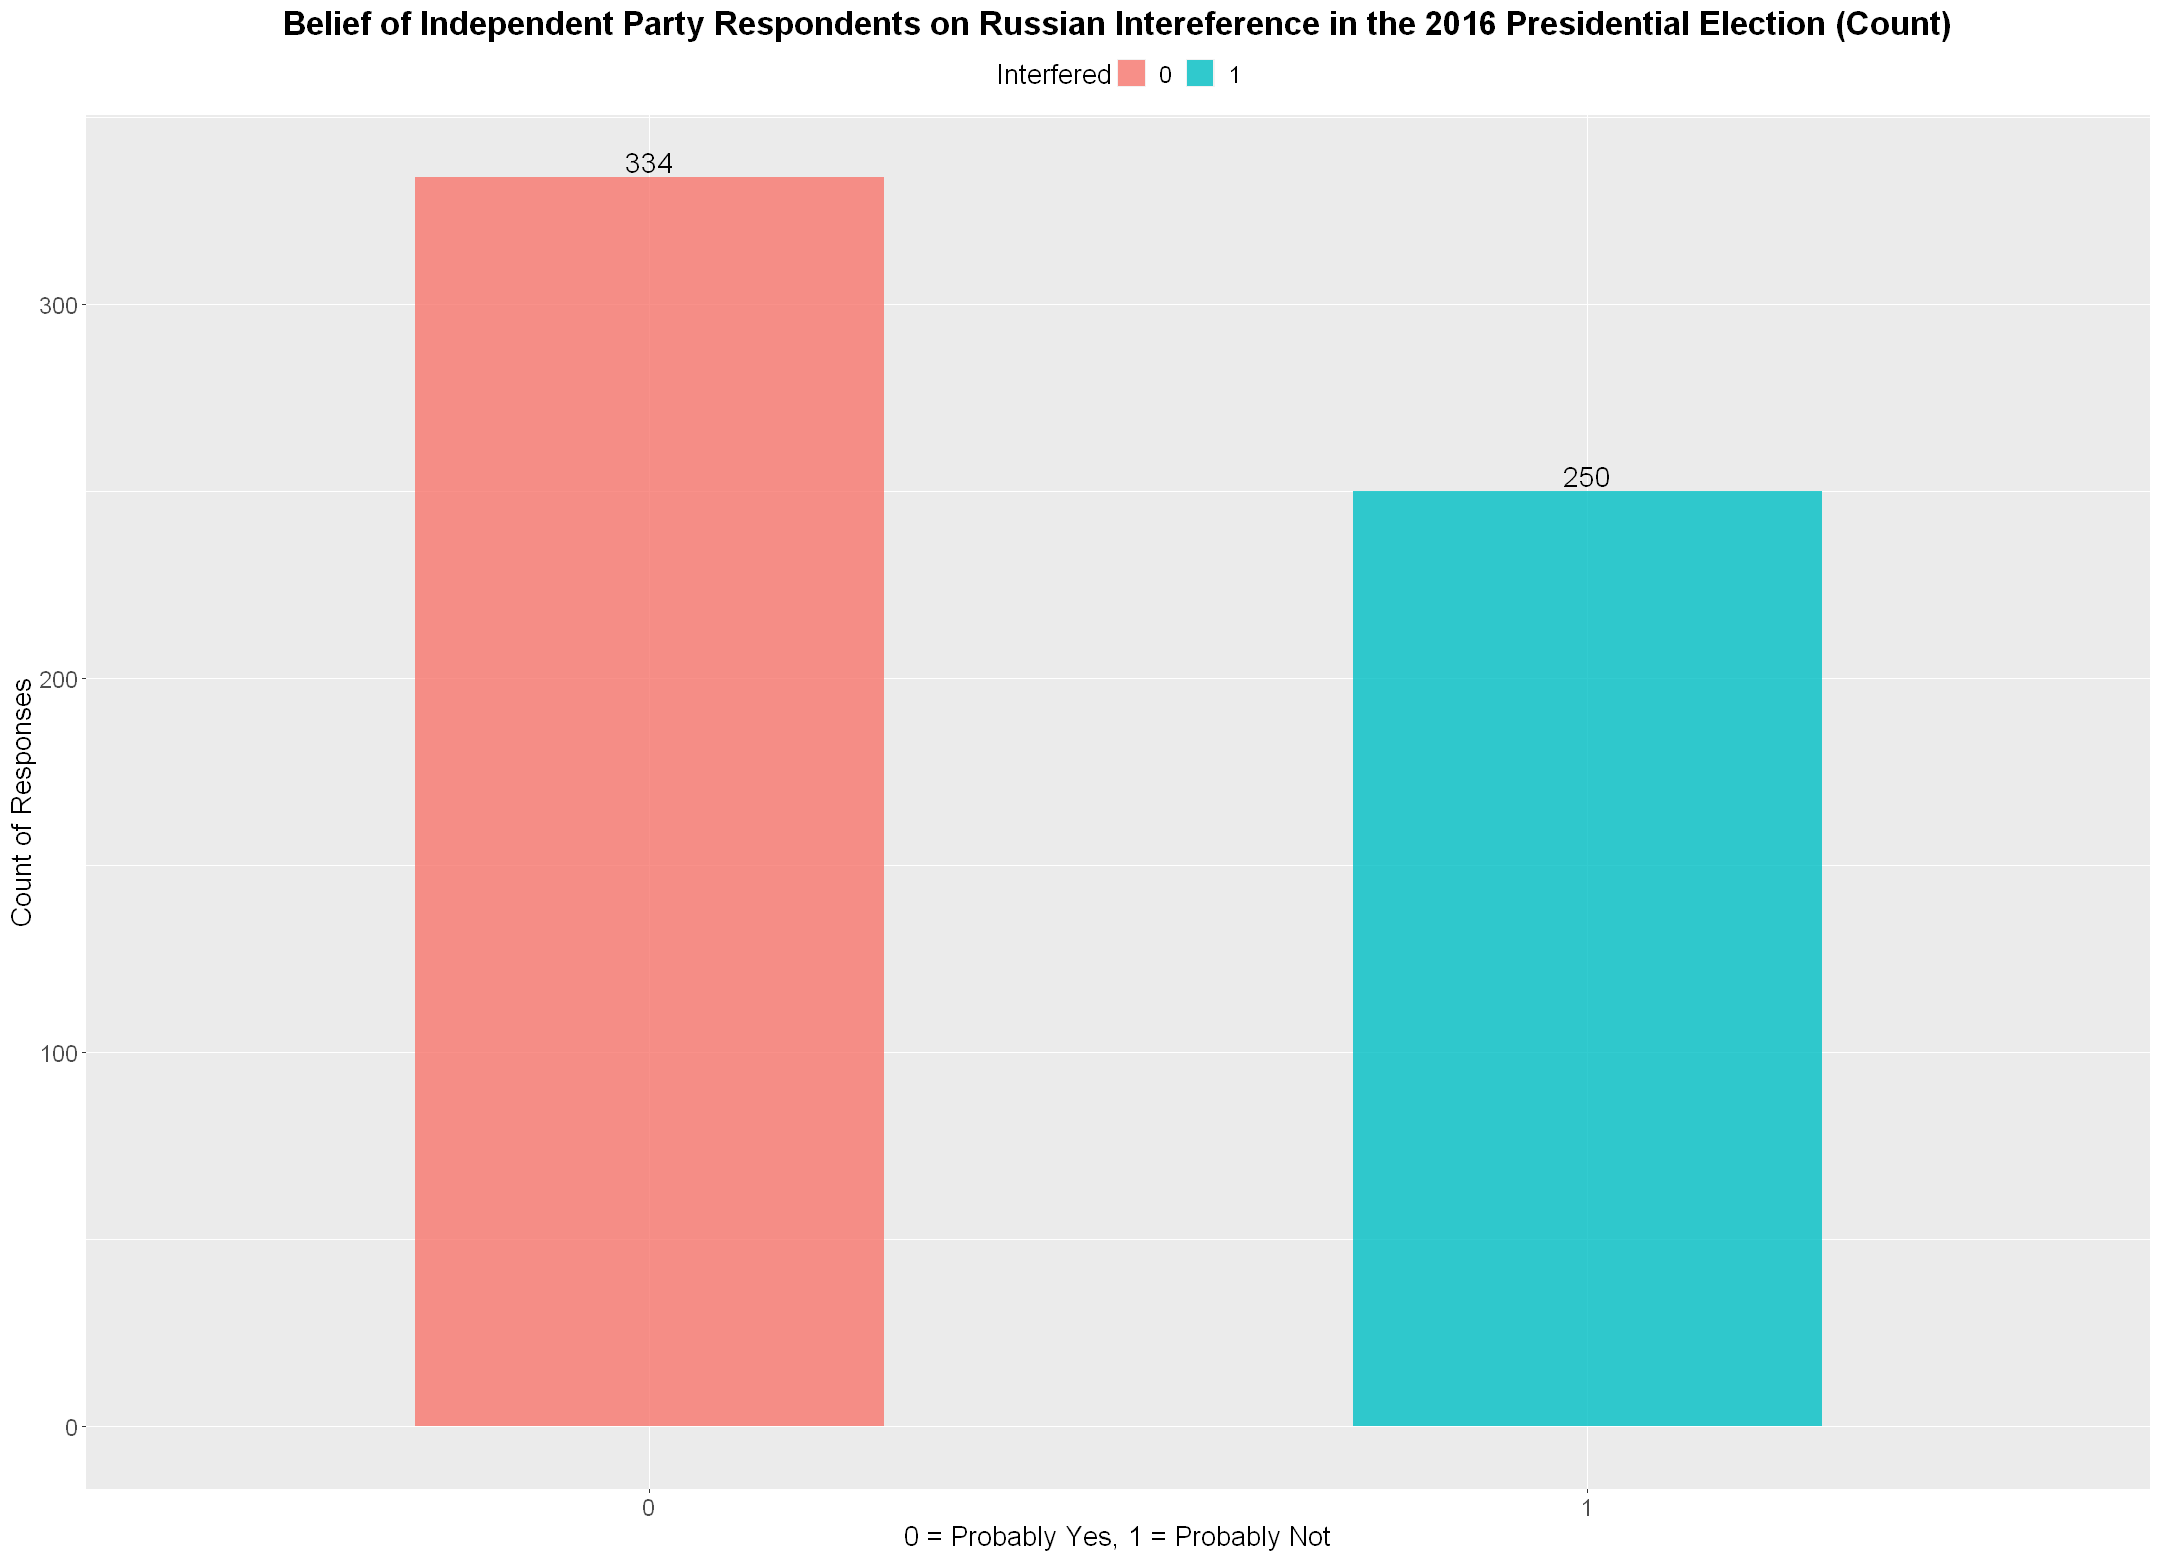

In [30]:
#count of Independent party respondents that answered 0 (Russia probably interfere) and 1 (Russia probably did not interfere)
rus_count = ggplot(df_rus ,aes(x = Interfered, fill = Interfered)) + 
    geom_bar(alpha = .8, width = 0.5) + 
    geom_text(aes(label =..count.., y =..count..), stat = "count", vjust = -.25, size = 6) +
    labs(title = "Belief of Independent Party Respondents on Russian Intereference in the 2016 Presidential Election (Count)", x = "0 = Probably Yes, 1 = Probably Not", 
    y = "Count of Responses") +
    plot_theme

rus_count

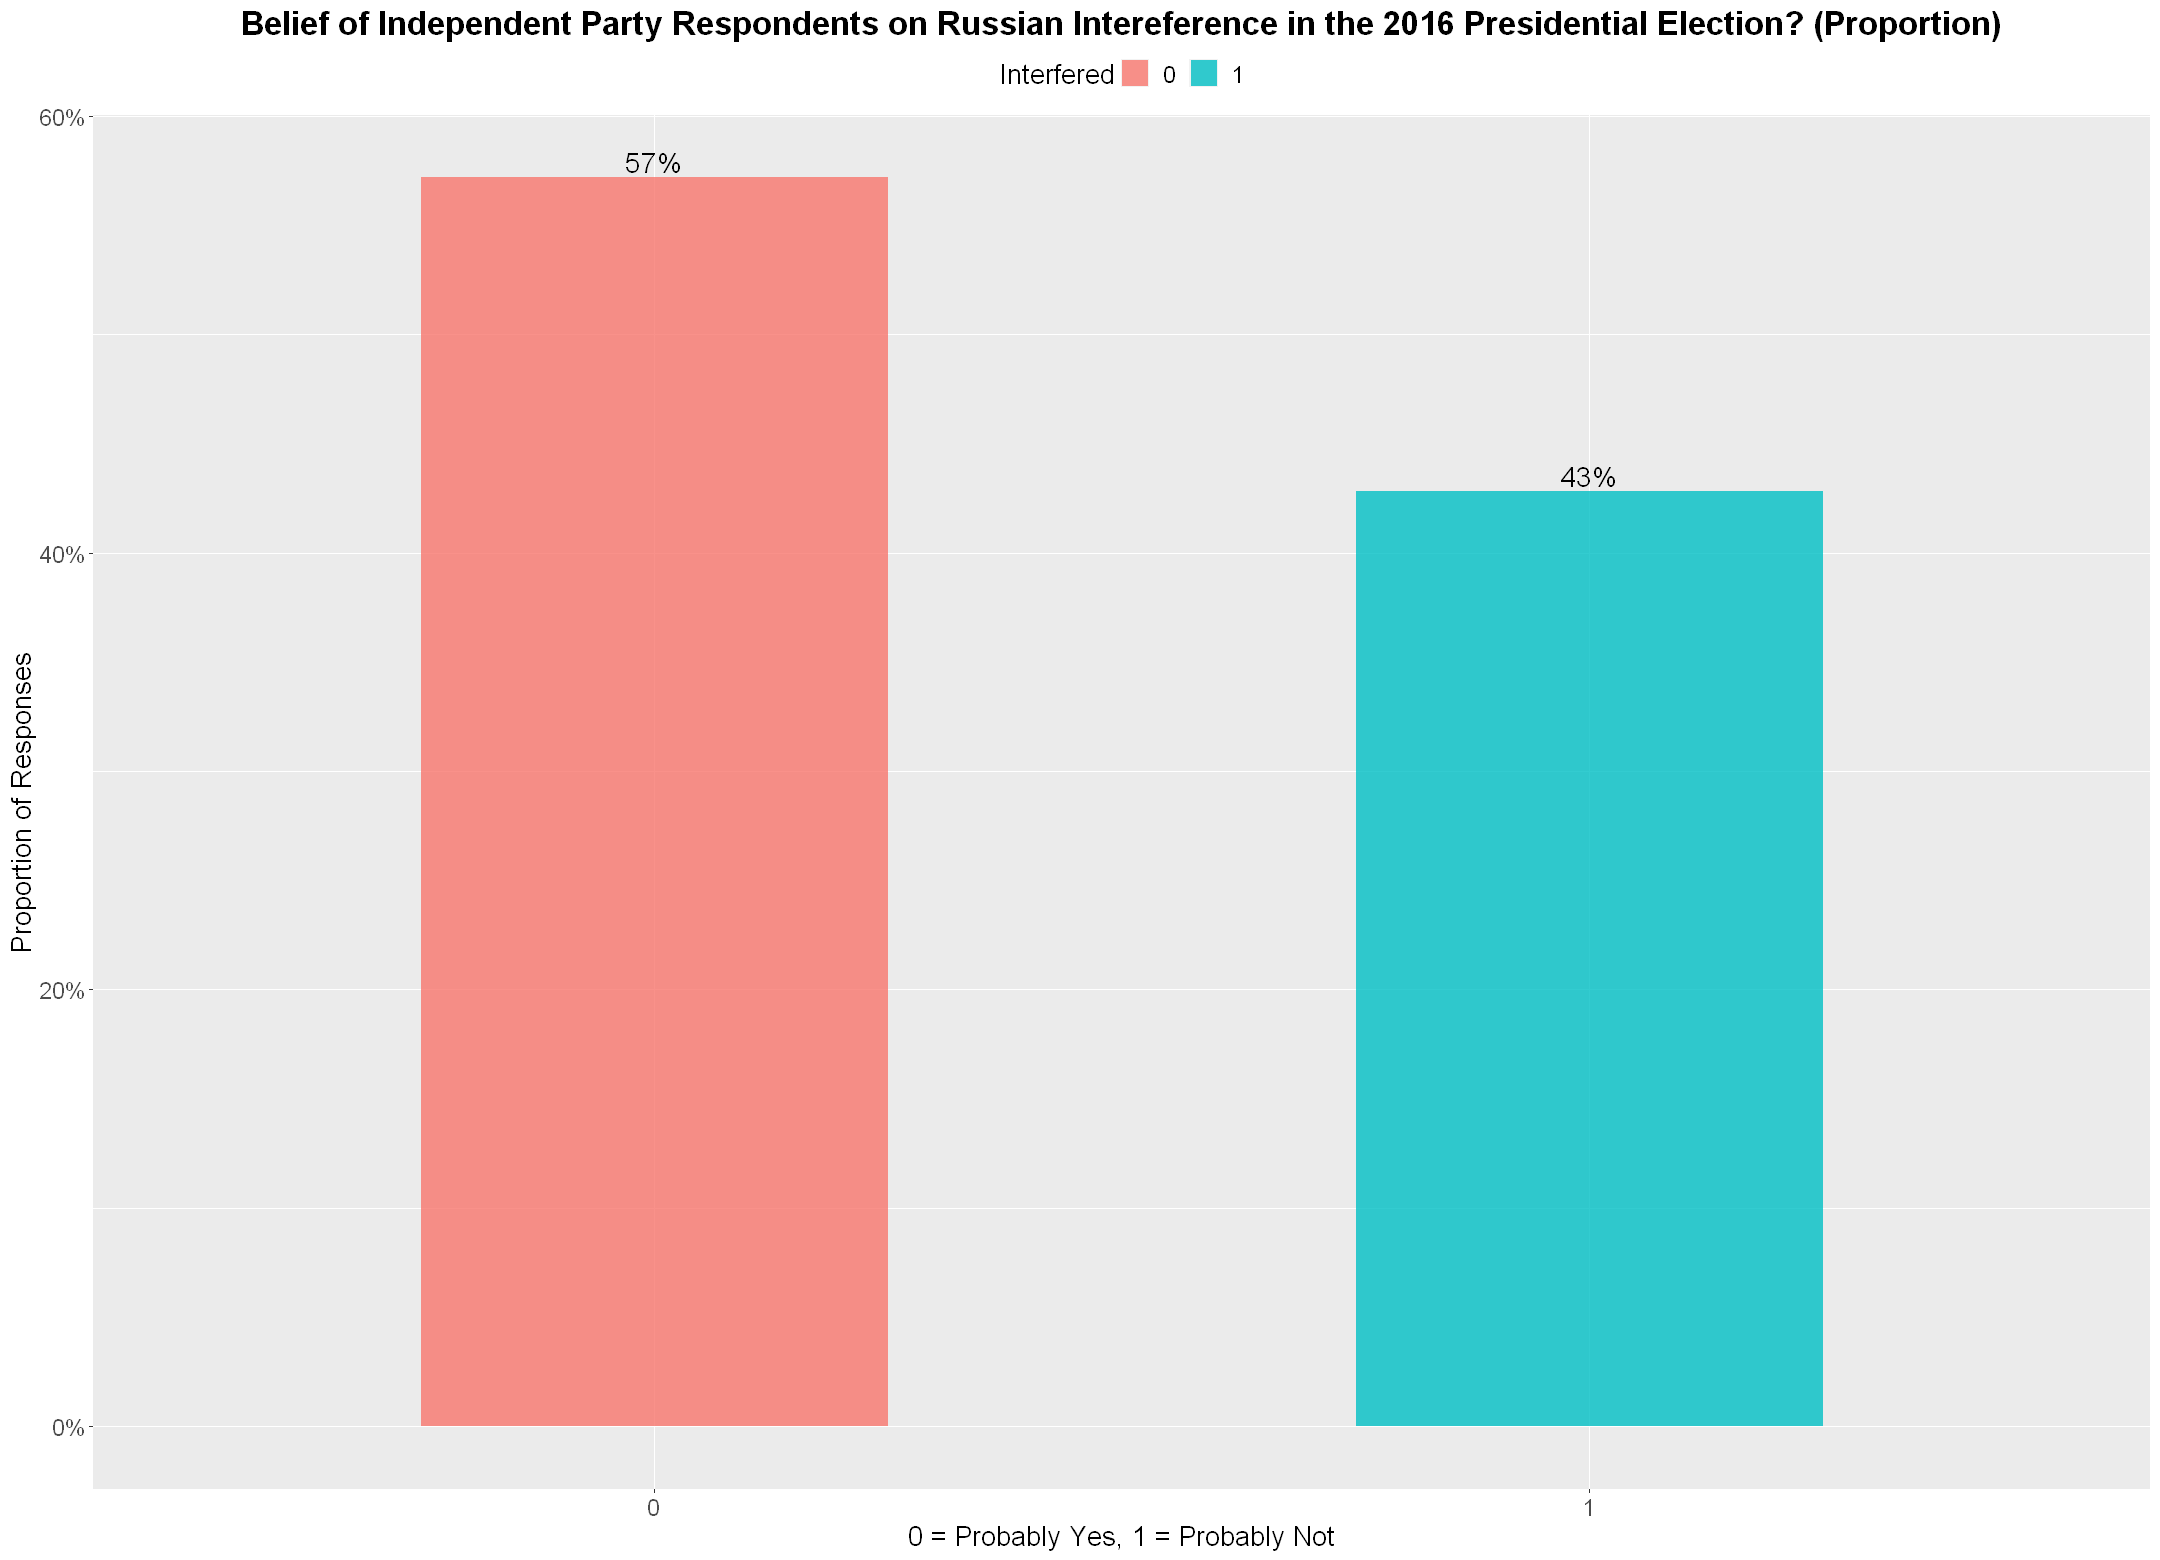

In [31]:
#proportion of Independent party respondents that answered 0 (Russia probably interfere) and 1 (Russia probably did not interfere)
rus_prop = ggplot(df_rus, aes(Interfered, fill = Interfered)) +
    geom_bar(alpha = .8, width = 0.5, aes(y=..count../sum(..count..))) + 
    geom_text(aes(label = scales::percent(round((..count..)/sum(..count..),2)), y= ((..count..)/sum(..count..))), stat = "count", vjust = -.25, size = 6) +
    labs(title = "Belief of Independent Party Respondents on Russian Intereference in the 2016 Presidential Election? (Proportion)", x = "0 = Probably Yes, 1 = Probably Not", 
    y = "Proportion of Responses") +
    scale_y_continuous(labels = scales::percent) + 
    plot_theme

rus_prop

>From the 2 bar charts, 55% (421 out of 767 responses) of those who self-identify with the Independent Party believe that Russia interfered in the 2016 Presidential election. 

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

> We believe a two sided, one sample T-test is appropriate for 3 reasons:
>
>1. We're interested in knowing whether the majority, which is defined as over 50%, of self-identified Independent respondents believe Russia interfered in the 2016 presidential electrion. Thus, the true mean can be greater, equal or less than 0.5, so a two sided test is more appropriate than a one-tailed t-test.
>2. Each observation is a random sample (independently and identically distributed) from the population meaning that each observation is independent of one another
>3. We have 767 observations, well over the n > 30 minimum requirement to invoke the Central Limit Theorem
>
>Because the two sided T-test will not tell us if the true mean is > 0.5, we will examine 95% confidence interval to determine if the true mean is less or greater than 0.5 in the case that the null hypothesis is rejected. But we will use the two sided T-test to determine if the majority of Independent voters feel that the federal investigations into Russian election inteference are baseless.
>
>Null hypothesis:
> - $H_{0}: \mu = 0.5$; there is no difference between Independent voters' belief whether Russia interfered in the 2016 president election
> 
>Alternative hypothesis:
> - $H_{a}: \mu \ne 0.5$; there is a difference difference between Independent voters' belief whether Russia interfered in the 2016 president election

### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [32]:
#Create a de-factored dataframe for the T-test
df_rus2 = df_rus
df_rus2$Interfered = as.numeric(as.character(df_rus2$Interfered))
head(df_rus2)

,Interfered,party
,<dbl>,<chr>
1,0,Independent
2,1,Independent
3,0,Independent
4,0,Independent
5,1,Independent
6,1,Independent


In [33]:
#Two sided, one sample T-test to assess statistical significance
t.test(df_rus2$Interfered, mu = .5)


	One Sample t-test

data:  df_rus2$Interfered
t = -3.5095, df = 583, p-value = 0.0004837
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.3878340 0.4683304
sample estimates:
mean of x 
0.4280822 


In [34]:
#One sided (greater than) T-test
#t.test(df_rus2$Interfered, mu =.5, alternative = "greater")

>To assess for practical significance or the effect size, we will use Cohen's d. Instead of comparing the means of 2 groups, we will compare it against a mu of 0.5.
>
> We will also be using the below table to interpret the computed effect size of the d-value:
>
>| d | Effect Size  |
>|---|---|
>|0.2   | Small  |
>|0.5  | Medium |
>|0.8   | Large   |

In [35]:
#Cohen's d to assess effect size/practical significance
cohensD(df_rus2$Interfered, mu = .5)

[1] 0.1452225

> #### Q3 Results Interpretation
>- **Statistical significance:** Because the one sample T-test's p-value of 0.006689 is much smaller than our alpha of .05, we can reject the null hypothesis and that the true mean is less than .5. This means the difference between Independent voters' belief whether Russia interfered in the 2016 president election is not statistically significant. In addition, the  95% CI of (0.4158139, 0.4864025) indicates that the true population mean is less than 50%.
>
>- **Practical significance:** Because the computed d-value is 0.09819036, the practical significance is very small. Thus, we can conclude that magnitude of the difference between Independent voter's belief regarding Russian interference in the 2016 presidential election is negligible. 
>
>In conclusion, the T-test and Cohen's d provide strong evidence that the difference in belief, among self-identified Independent voters, of whether Russia interfered in the 2016 presidential election is not significant, from both a statistical and practical perspective.

## Question 4: Was anger or fear more effective at driving increases in voter turnout from 2016 to 2018?

### Introduce your topic briefly.  (5 points)
Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.

>Our goal is to understand levels of voter fear and anger as a measure of influence to voter turnout. Specifically, we wish to determine which of the 2 emotions play a more contributing factor to voter turnout. To conduct the analysis, we will need to operationalize 3 variables:
>1. Anger
>2. Fear
>3. Voter turnout
>
>From the ANES survey, there is a question called Global Emotion Battery (GEB) that prompts respondents to rank their sentiment towards a specific emotion with respect to the way things are going in the country these days. Two of the emotions listed are anger (geangry) and fear (geafraid), which will use for the analysis. There is also another question that asks respondents to rate the same set of emotions towards Donald Trump and his actions in office. While anger and fear against Donald Trump may factor into increased turnout, it most likely only applies on the Democratic side and the same logic may not apply to Republicans. Thus, we will only use the anger and fear variable from the GEB question (both variables are Likert data or ordinal data on a ranked scale).
>
>We operationalize the definition of increased turnout sample to include those respondents that voted in 2018 versus those who did not vote. We are not comparing voters in 2018 with 2016 to deduce this because we are not arguing whether increased turnout happened in this research, but rather taking it on face value that it did and relying on other research that has shown the 2018 off-cycle election did indeed have higher turnout (also known as a wave election). Moreover, we would also need the same GEB question and response data for the 2016 election as a baseline if we wish to understand which of the 2 emotions _caused_ the increase in voter turnout. However, that data is unavailable. Thus, we make the assumption that turnout was higher and evaluate which emotion, anger or fear, was a more influential driver of voter turout in 2018. The variable of interest and its associated prompt is:
>- **turnout18:** In the election held on November 6, did you definitely vote in person on election day, vote in person before Nov 6, vote by mail, did you definitely not vote, or are you not completely sure whether you voted in that election?
>
> For respondents that were not sure if they voted in 2018, they were asked: "If you had to guess, would you say that you probably did vote in the election held on
November 6, or probably did not vote in that election?" This is an example of a leading question and forces the user to recall from memory, which has been shown to cause memory error or the incorrect recall of information. For this reason, we have excluded any "Probably did vote" responses to minimize contamination of unreliable data into the analysis.

### Perform an exploratory data analysis (EDA) of the relevant variables. (5 points)
This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

In [36]:
#Create a new dataframe with geangry, geafraid and turnout18 variables/columns
df_emo = select(A, geangry, geafraid, turnout18)
names(df_emo)[names(df_emo) == "geangry"] = "anger" #renames geangry to anger
names(df_emo)[names(df_emo) == "geafraid"] = "afraid" #renames geafraid to fear
names(df_emo)[names(df_emo) == "turnout18"] = "voted18" #renames turnout18 to voted18
df_emo$anger[df_emo$anger == -7] = NA #recode no answers (-7 value) to NA
df_emo$afraid[df_emo$afraid == -7] = NA #recode no answers (-7 value) to NA
df_emo$anger = factor(df_emo$anger, levels = 1:5, labels = c("Not at all", "A little", "Somewhat", "Very", "Extremely"), ordered = TRUE) #factorize integer values to 5 emotion levels
df_emo$afraid = factor(df_emo$afraid, levels = 1:5, labels = c("Not at all", "A little", "Somewhat", "Very", "Extremely"), ordered = TRUE) #factorize integer values into 5 emotion levels
df_emo$voted18 = ifelse(df_emo$voted18 %in% 1:3, "Voted", "Not Voted" ) #response value of 1:3 indicates the respondent voted in 2018
df_emo$voted18 = factor(df_emo$voted18, levels = c("Voted", "Not Voted"), ordered = TRUE) #factorize values into 2 levels (voted and not voted)

summary(df_emo)
head(df_emo, 10)

        anger            afraid         voted18    
 Not at all:378   Not at all:460   Voted    :1827  
 A little  :384   A little  :463   Not Voted: 196  
 Somewhat  :444   Somewhat  :477                   
 Very      :412   Very      :375                   
 Extremely :403   Extremely :244                   
 NA's      :  2   NA's      :  4                   

,anger,afraid,voted18
,<ord>,<ord>,<ord>
1,A little,A little,Voted
2,Not at all,Not at all,Not Voted
3,A little,Somewhat,Voted
4,Somewhat,Somewhat,Voted
5,Not at all,Very,Voted
6,Not at all,Somewhat,Voted
7,Somewhat,Somewhat,Not Voted
8,Very,Very,Voted
9,Extremely,Extremely,Voted


In [37]:
#Change wide format into long format by collapsing fear and afraid into a single variable called "emotion_type"
df_emo2 = df_emo %>% gather(emotion_type, scale, 1:2, factor_key = TRUE)
df_emo2$scale = factor(df_emo2$scale, levels = c("Not at all", "A little", "Somewhat", "Very", "Extremely"), ordered = TRUE) #factorize values into 2 levels (voted and not voted)

nrow(df_emo2) #sanity check to make sure there are 5000 rows (2500 * 2)
head(df_emo2)

[1] 4046

,voted18,emotion_type,scale
,<ord>,<fct>,<ord>
1,Voted,anger,A little
2,Not Voted,anger,Not at all
3,Voted,anger,A little
4,Voted,anger,Somewhat
5,Voted,anger,Not at all
6,Voted,anger,Not at all


In [38]:
#create an "anger" specific datafram with relative proportion between voters and non-voters
df_angry_voted = df_emo2 %>% #voters df
    filter(emotion_type == "anger" & voted18 == "Voted") %>%
    group_by(scale, voted18) %>%
    tally() %>% #counts the number of responses
    group_by(voted18) %>%
    mutate(percent = n/sum(n) * 100) %>%
    arrange(voted18)

df_angry_not_voted = df_emo2 %>% #non voters df
    filter(emotion_type == "anger" & voted18 == "Not Voted") %>%
    group_by(scale, voted18) %>%
    tally() %>% #counts the number of responses
    group_by(voted18) %>%
    mutate(percent = n/sum(n) * 100) %>%
    arrange(voted18)

df_angry = rbind(df_angry_voted, df_angry_not_voted)
names(df_angry)[names(df_angry) == "n"] = "count" #renames n to count
df_angry$emo = "Anger"
df_angry = df_angry[c(5, 2,1,3,4)] #reoders column index

sum(df_angry$count) #sanity check total adds up to 2500
sum(df_angry$percent) #sanity check that total percent adds up to 100
df_angry

[1] 2023

[1] 200

emo,voted18,scale,count,percent
<chr>,<ord>,<ord>,<int>,<dbl>
Anger,Voted,Not at all,337,18.4455391
Anger,Voted,A little,344,18.8286809
Anger,Voted,Somewhat,387,21.1822660
Anger,Voted,Very,377,20.6349206
Anger,Voted,Extremely,380,20.7991242
Anger,Voted,NA,2,0.1094691
Anger,Not Voted,Not at all,41,20.9183673
Anger,Not Voted,A little,40,20.4081633
Anger,Not Voted,Somewhat,57,29.0816327


In [39]:
#create an "afraid" specific datafram with relative proportion between voters and non-voters
df_afraid_voted = df_emo2 %>% #voters df
    filter(emotion_type == "afraid" & voted18 == "Voted") %>%
    group_by(scale, voted18) %>%
    tally() %>% #counts the number of responses
    group_by(voted18) %>%
    mutate(percent = n/sum(n) * 100) %>%
    arrange(voted18)

df_afraid_not_voted = df_emo2 %>% #non voters df
    filter(emotion_type == "afraid" & voted18 == "Not Voted") %>%
    group_by(scale, voted18) %>%
    tally() %>% #counts the number of responses
    group_by(voted18) %>%
    mutate(percent = n/sum(n) * 100) %>%
    arrange(voted18)

df_afraid = rbind(df_afraid_voted, df_afraid_not_voted)
names(df_afraid)[names(df_afraid) == "n"] = "count" #renames n to count
df_afraid$emo = "Afraid"
df_afraid = df_afraid[c(5,2,1,3,4)] #reoders column index

sum(df_afraid$count) #sanity check total adds up to 2500
sum(df_afraid$percent) #sanity check that total percent adds up to 100
df_afraid

[1] 2023

[1] 200

emo,voted18,scale,count,percent
<chr>,<ord>,<ord>,<int>,<dbl>
Afraid,Voted,Not at all,410,22.4411604
Afraid,Voted,A little,420,22.9885057
Afraid,Voted,Somewhat,431,23.5905857
Afraid,Voted,Very,341,18.6644773
Afraid,Voted,Extremely,221,12.0963328
Afraid,Voted,NA,4,0.2189381
Afraid,Not Voted,Not at all,50,25.5102041
Afraid,Not Voted,A little,43,21.9387755
Afraid,Not Voted,Somewhat,46,23.4693878


In [40]:
#combine both df_angry and df_afraid into a single dataframe for visualization and analysis
df_all = rbind(df_afraid, df_angry)
df_all$emo = factor(df_all$emo, levels = c("Anger", "Afraid"), ordered = TRUE) #factorize values into 2 levels (voted and not voted)
sum(df_all$count) #sanity check to make sure it adds up to 5000 (2500 * 2 df)
sum(df_all$percent) #sanity check to make sure the percent adds up to 200 (100 * 2 df)
df_all

[1] 4046

[1] 400

emo,voted18,scale,count,percent
<ord>,<ord>,<ord>,<int>,<dbl>
Afraid,Voted,Not at all,410,22.4411604
Afraid,Voted,A little,420,22.9885057
Afraid,Voted,Somewhat,431,23.5905857
Afraid,Voted,Very,341,18.6644773
Afraid,Voted,Extremely,221,12.0963328
Afraid,Voted,NA,4,0.2189381
Afraid,Not Voted,Not at all,50,25.5102041
Afraid,Not Voted,A little,43,21.9387755
Afraid,Not Voted,Somewhat,46,23.4693878


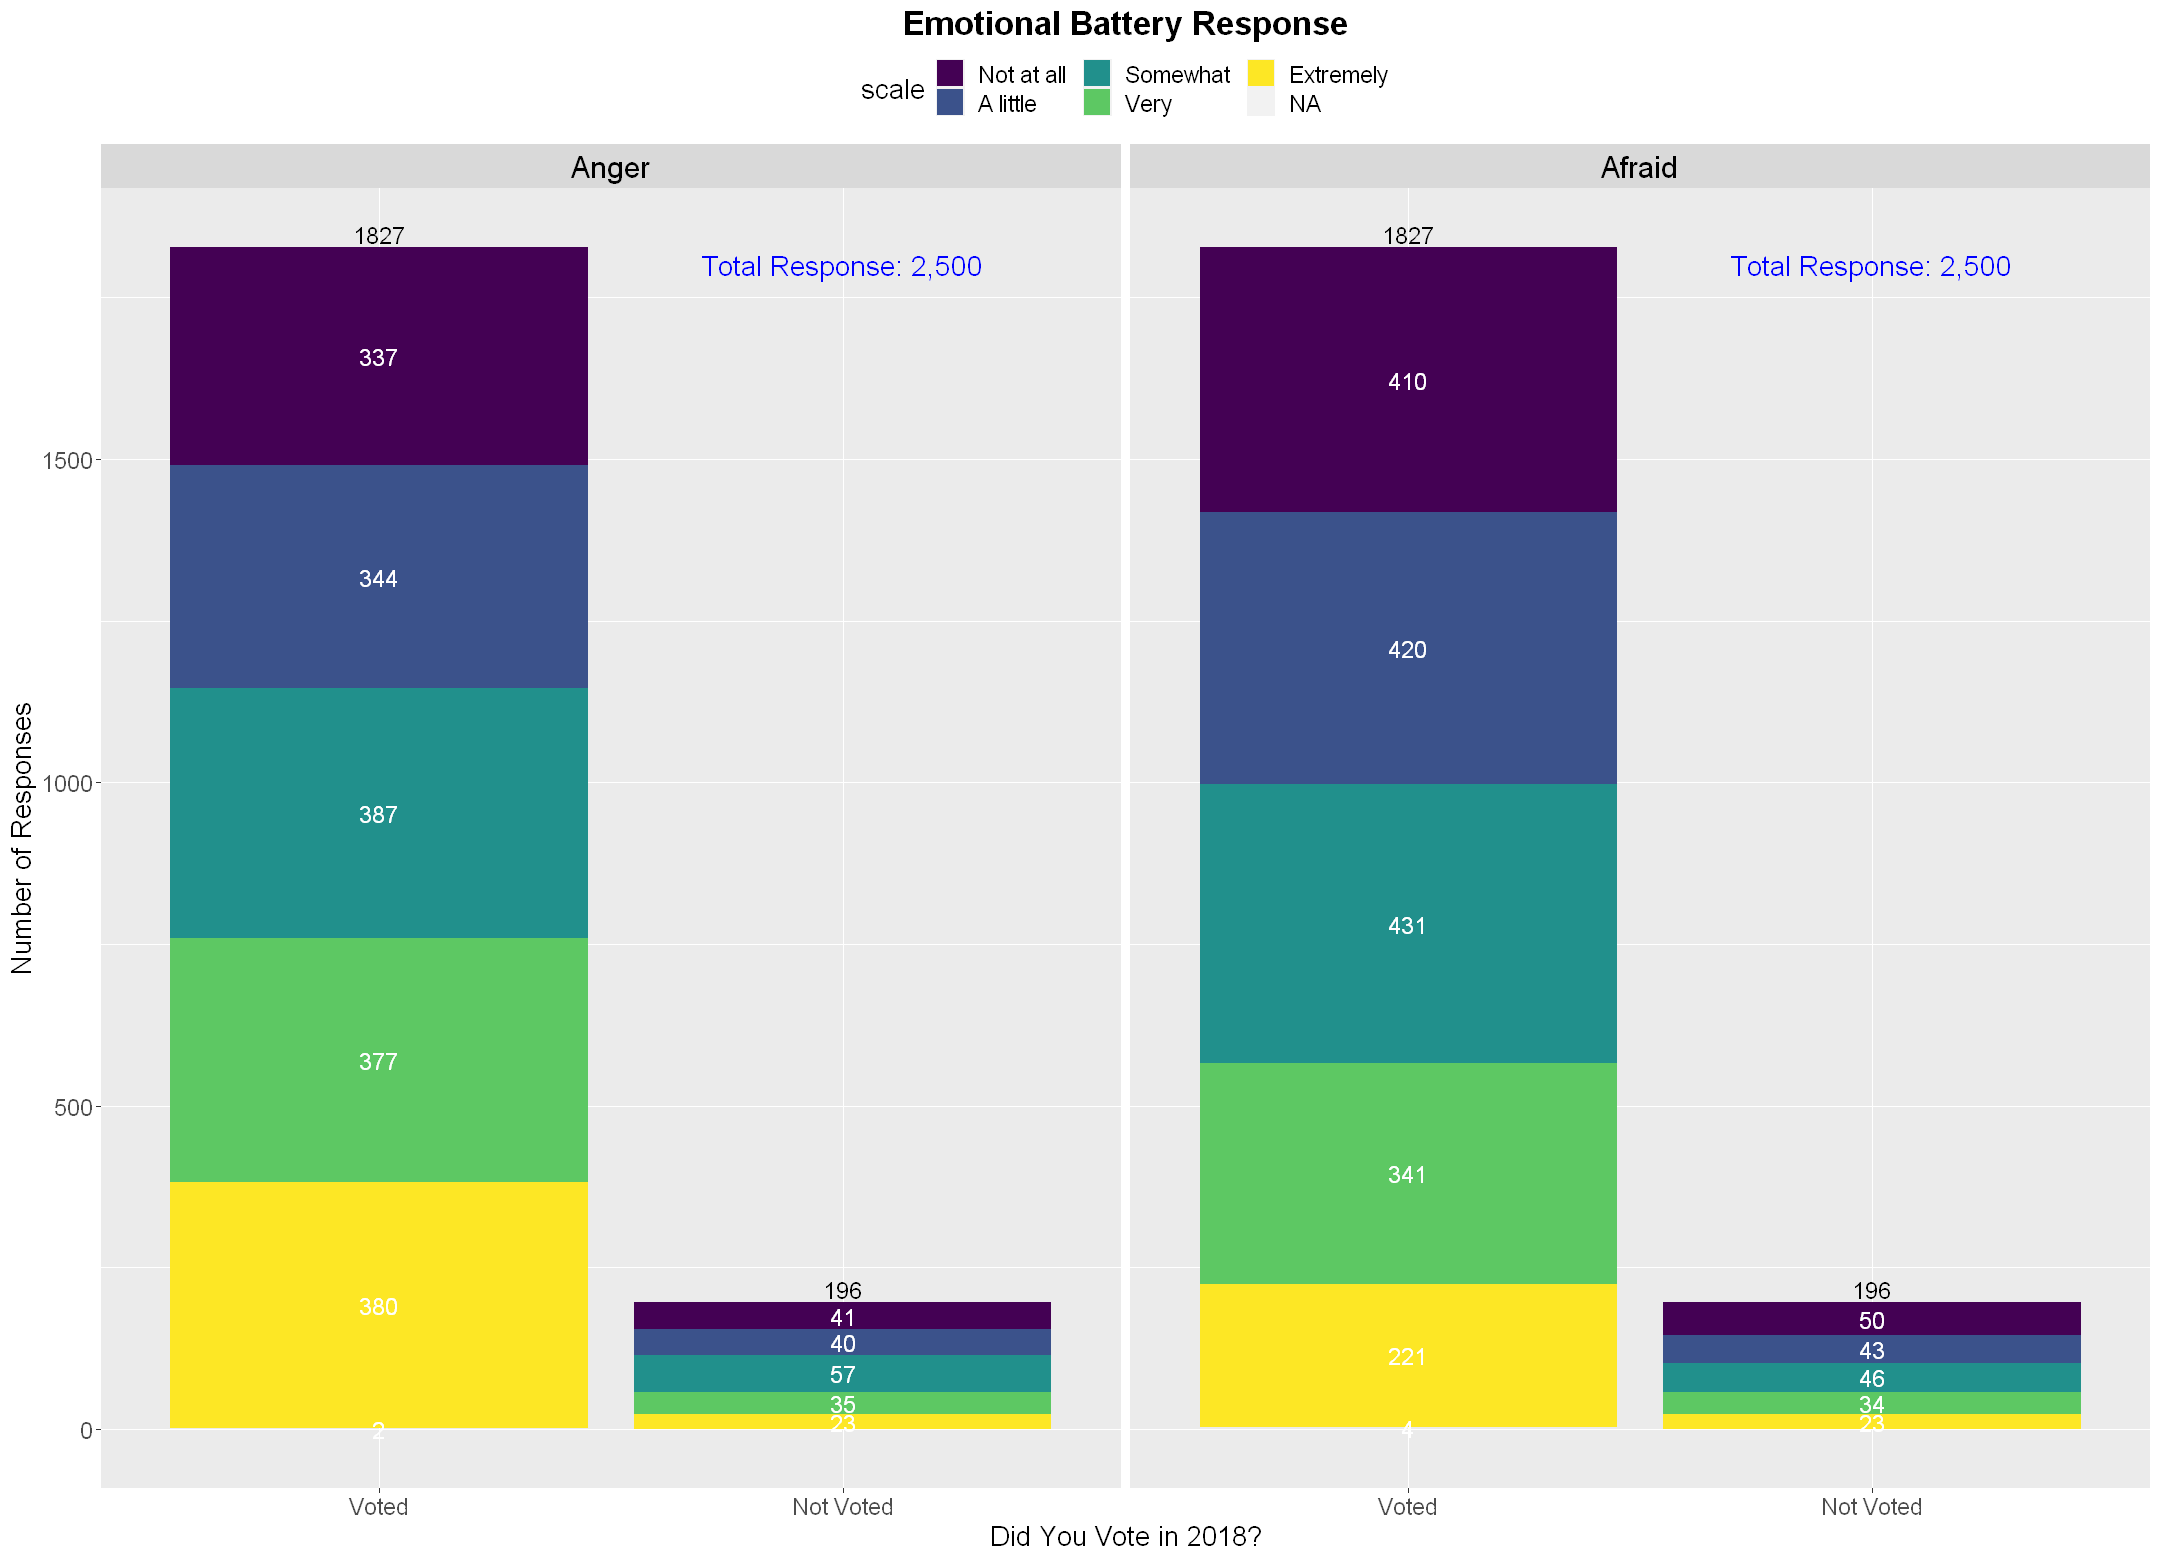

In [41]:
#Response count by emotion and scale
emo_c = ggplot(df_all, mapping = aes(x = voted18, y = count, fill = scale)) +
    facet_wrap(~ emo) + 
    geom_col() +
    geom_text(aes(label = count, y = count), size = 5, position = position_stack(vjust = 0.5), color = "white") +
    stat_summary(fun = sum, aes(label = ..y.., group = voted18), size = 5, geom = "text", vjust = -.25) +
    annotate(geom = "text", x = 2, y =1800, label = "Total Response: 2,500", color = "blue", size = 6) +
    labs(title="Emotional Battery Response", y = "Number of Responses", x = "Did You Vote in 2018?") +
    theme(strip.text.x = element_text(size = 18, color = "black")) +
    plot_theme

emo_c

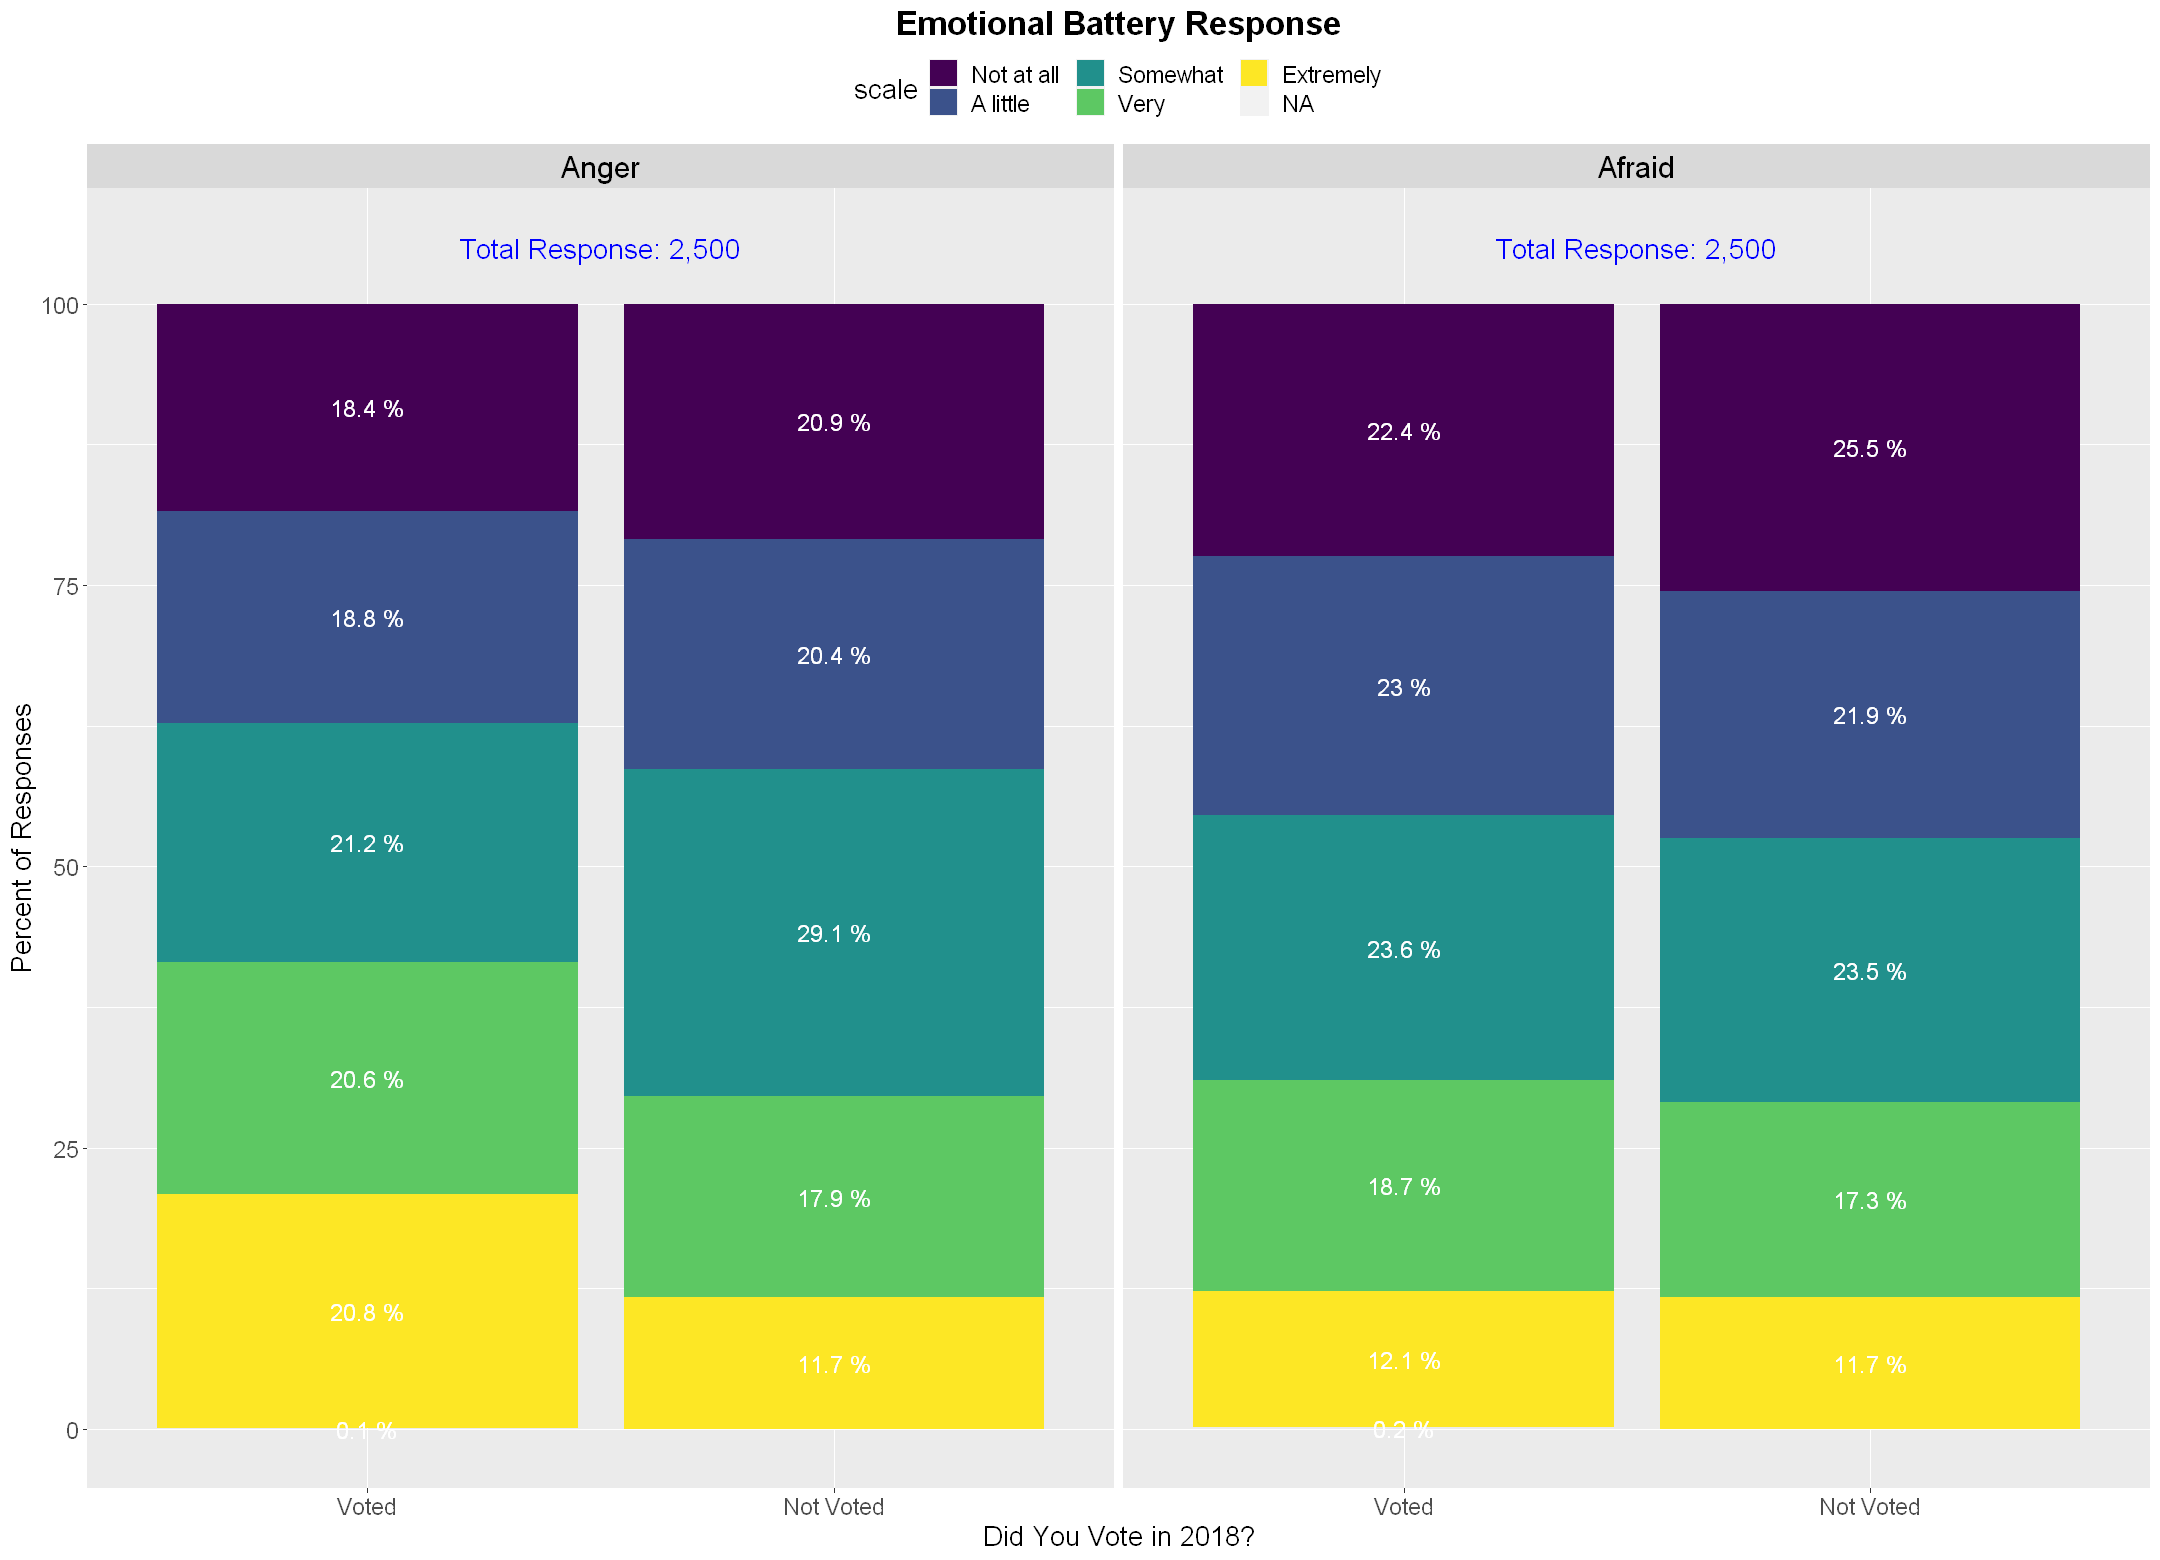

In [42]:
#Response proprotion by emotion and scale
emo_p = ggplot(df_all, mapping = aes(x = voted18, y = percent, fill = scale)) +
    facet_wrap(~ emo) + 
    geom_col() +
    geom_text(aes(label = paste(round(percent,1),"%")), size = 5, position = position_stack(vjust = 0.5), color = "white") +
    annotate(geom = "text", x = 1.5, y =105, label = "Total Response: 2,500", color = "blue", size = 6) +
    labs(title = "Emotional Battery Response", y = "Percent of Responses", x = "Did You Vote in 2018?") +
    theme(strip.text.x = element_text(size = 18, color = "black")) + 
    plot_theme

emo_p 

>First and foremost, there were disproportionately more voters than non-voters in the 2018 election by almost 3 factor. When we examine the scale of emotional response with respect to both anger and fear (afraid), it seems that voters were more emotionally charged than non-voters. For example, over 40% of voters said they felt extremely or very angry with the way things were going in 2018 while only 25% of non-voters felt the same way. Similarily, over 30% voters stated that they were extremely or very fearful of how things were in 2018 while less than 23% of non-voters responded with the same emotional degree. An interesting hypothesis to this phenomenon is that qualified voters who had an extreme representation of their emotional state were more compelled to vote in 2018 thinking that their action would bring about meaningful change that would help dissipate what they were feeling at the time.

### Based on your EDA, select an appropriate hypothesis test.  (5 points)
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

>Due to the way the Emotional Battery Response data are formatted (i.e. ordinal data and with factors), the assumptions of conventional parametric statistical analysis are often violated. Additionally, since we are dealing with categorical variables, the chi-square test of independence is the most approriate. Specifically, we will use the chi-square test to conduct two separate tests to determine if there are any significant relationships between either emotion of interest (anger and fear) with voter turnout in 2018. The chi-square tests will be used to  used to compare the distribution our categorical variables  of anger and fear in a sample . If the distribution of the anger or fear is not much different over different groups (voters and non-voters), we can conclude the distribution of the anger and fear categorical variables are not related to the different groups. Or we can say the categorical variable and groups are independent. In the event that both anger and fear are related to either groups, then we will use the effect size to determine which emotion is more influential. Thus, there are 2 tests that we will conduct one for each emotion variable.
>
>**Anger**
>
>Null hypothesis:
>
>- $H_0{anger}:$ Distribution of responses for both voters and non-voters are those stated in the percent column of df_anger; no association between anger and voter turnout
>
>Alternative hypothesis:
>
>- $H_a{anger}:$ Distribution of responses for both voters and non-voters are dffierent than those stated in the percent column of df_anger; association between anger and voter turnout
>
>**Fear (Afraid)**
>
>Null hypothesis:
>
>- $H_0{fear}:$ Distribution of responses for both voters and non-voters are those stated in the percent column of df_afraid; no association between fear and voter turnout
>
>Alternative hypothesis:
>
>- $H_a{fear}:$ Distribution of responses for both voters and non-voters are dffierent than those stated in the percent column of df_afraid; association between fear and voter turnout



### Conduct your test. (5 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.  Make sure you relate your findings to the original research question.

In [43]:
#setting up the wide format of df_anger to prep for chi-square test (association between anger and 2018 voter turnout)
df_a = select(df_angry, voted18, scale, count)
df_a = spread(df_a, voted18, count)
df_a = head(df_a, -1) #remove "NA" row from analysis

df_a

scale,Voted,Not Voted
<ord>,<int>,<int>
Not at all,337,41
A little,344,40
Somewhat,387,57
Very,377,35
Extremely,380,23


In [44]:
#anger vs. turnout chi-square test and analysis
anger_chi = chisq.test(as.matrix(df_a[, -1])) #
anger_chi


	Pearson's Chi-squared test

data:  as.matrix(df_a[, -1])
X-squared = 13.804, df = 4, p-value = 0.007949


anger_scale,Voted,Not Voted
<chr>,<dbl>,<dbl>
1-Not at all,-0.23,0.72
2-A little,-0.15,0.45
3-Somewhat,-0.70,2.12
4-Very,0.26,-0.78
5-Extremely,0.84,-2.57


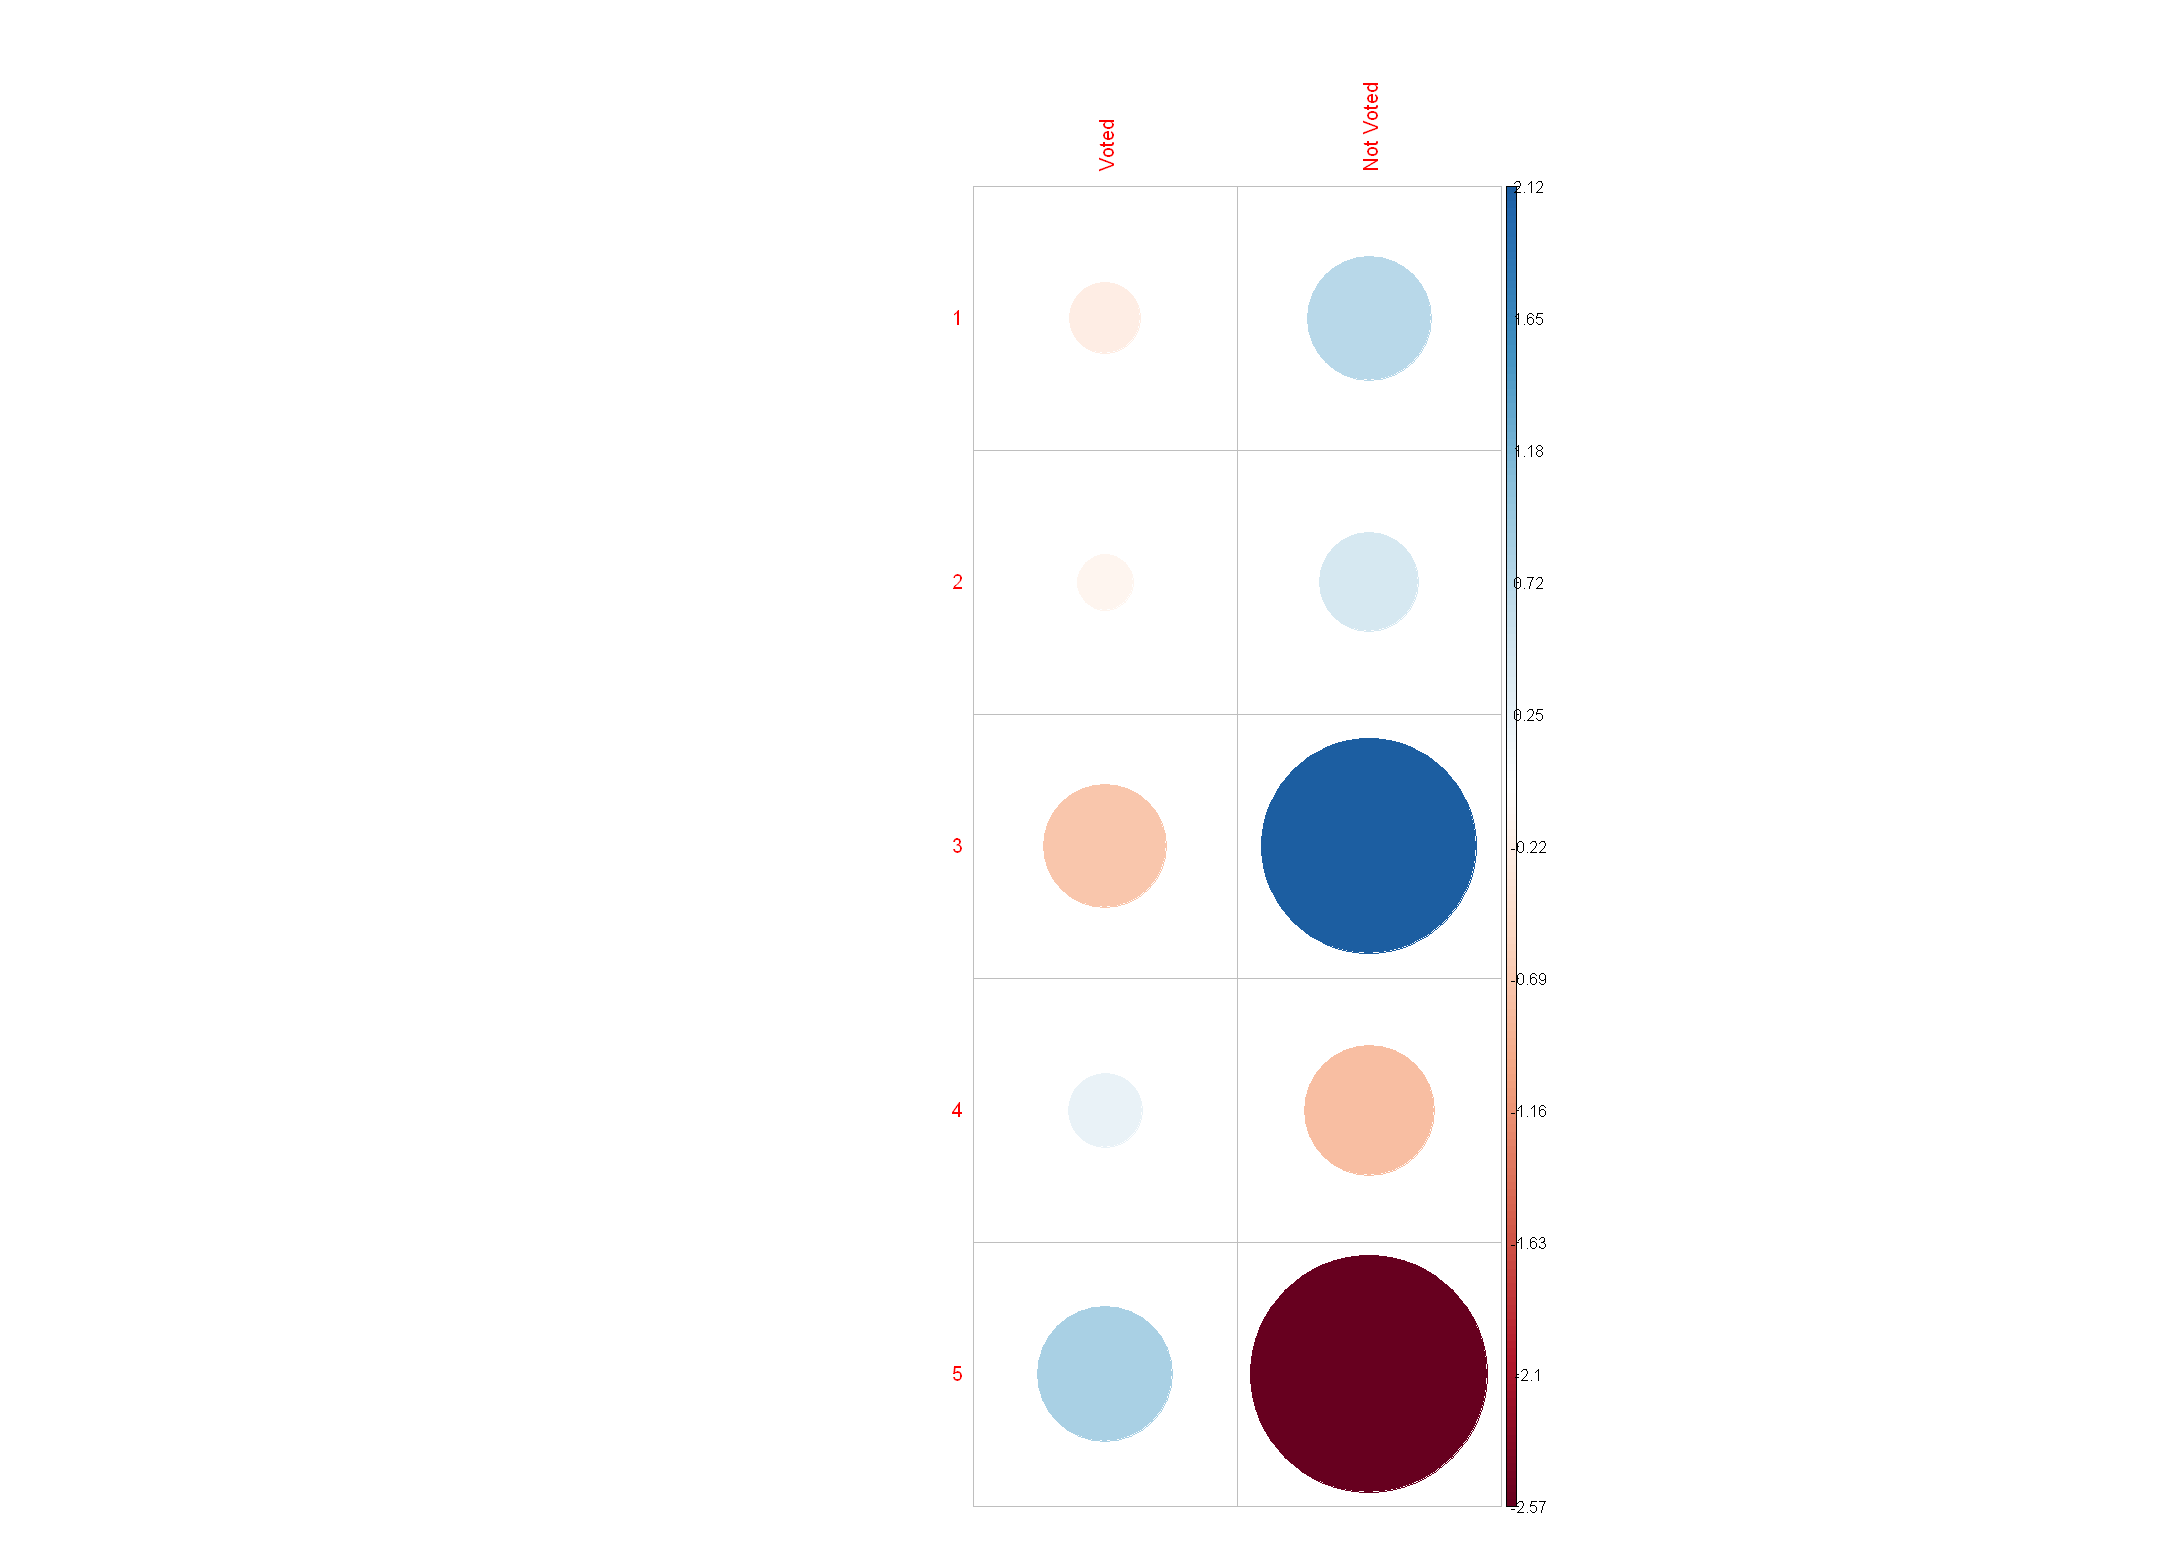

In [45]:
#anger chi square residuals
anger_chi_res = as.data.frame(round(anger_chi$residuals,2))
anger_chi_res$anger_scale = c("1-Not at all", "2-A little", "3-Somewhat", "4-Very", "5-Extremely")
anger_chi_res = anger_chi_res[c(3,1,2)]
anger_chi_res

corrplot(anger_chi$residuals, is.cor = FALSE)

>The residuals tell us the most contributing cells to the total Chi-square score, which is also visualized in a plot by the size of the circle. The sign of the standardized residuals is important to interpret the association between fear scale and voting participation group. 
>- **Positive Residuals:** Positive values specify an attraction (positive association) between the each anger scale and each of the voter/non-voter group. This is shown as blue in the plot.
>    - In the plot above, we can see that voters have a strong positive associaton with very and extreme levels of anger 
>- **Negative Residuals:** Negative values specify a repulsion (negative association) between the each anger scale and each of the voter/non-voter group. This is shown as red in the plot.
>    - In the plot above, we can see that non-voters have a strong negative associaton with very and extreme levels of anger while they have a strong positive association with no fear (Not at all)

In [46]:
#setting up the wide format of df_fear to prep for chi-square test (association between anger and 2018 voter turnout)
df_f = select(df_afraid, voted18, scale, count)
df_f = spread(df_f, voted18, count)
df_f = head(df_f, -1) #remove "NA" row from analysis

df_f

scale,Voted,Not Voted
<ord>,<int>,<int>
Not at all,410,50
A little,420,43
Somewhat,431,46
Very,341,34
Extremely,221,23


In [47]:
#fear vs. turnout chi-square test and analysis
fear_chi = chisq.test(as.matrix(df_f[, -1]))
fear_chi


	Pearson's Chi-squared test

data:  as.matrix(df_f[, -1])
X-squared = 1.0019, df = 4, p-value = 0.9095


fear_scale,Voted,Not Voted
<chr>,<dbl>,<dbl>
1-Not at all,-0.26,0.80
2-A little,0.10,-0.29
3-Somewhat,0.01,-0.04
4-Very,0.13,-0.40
5-Extremely,0.05,-0.14


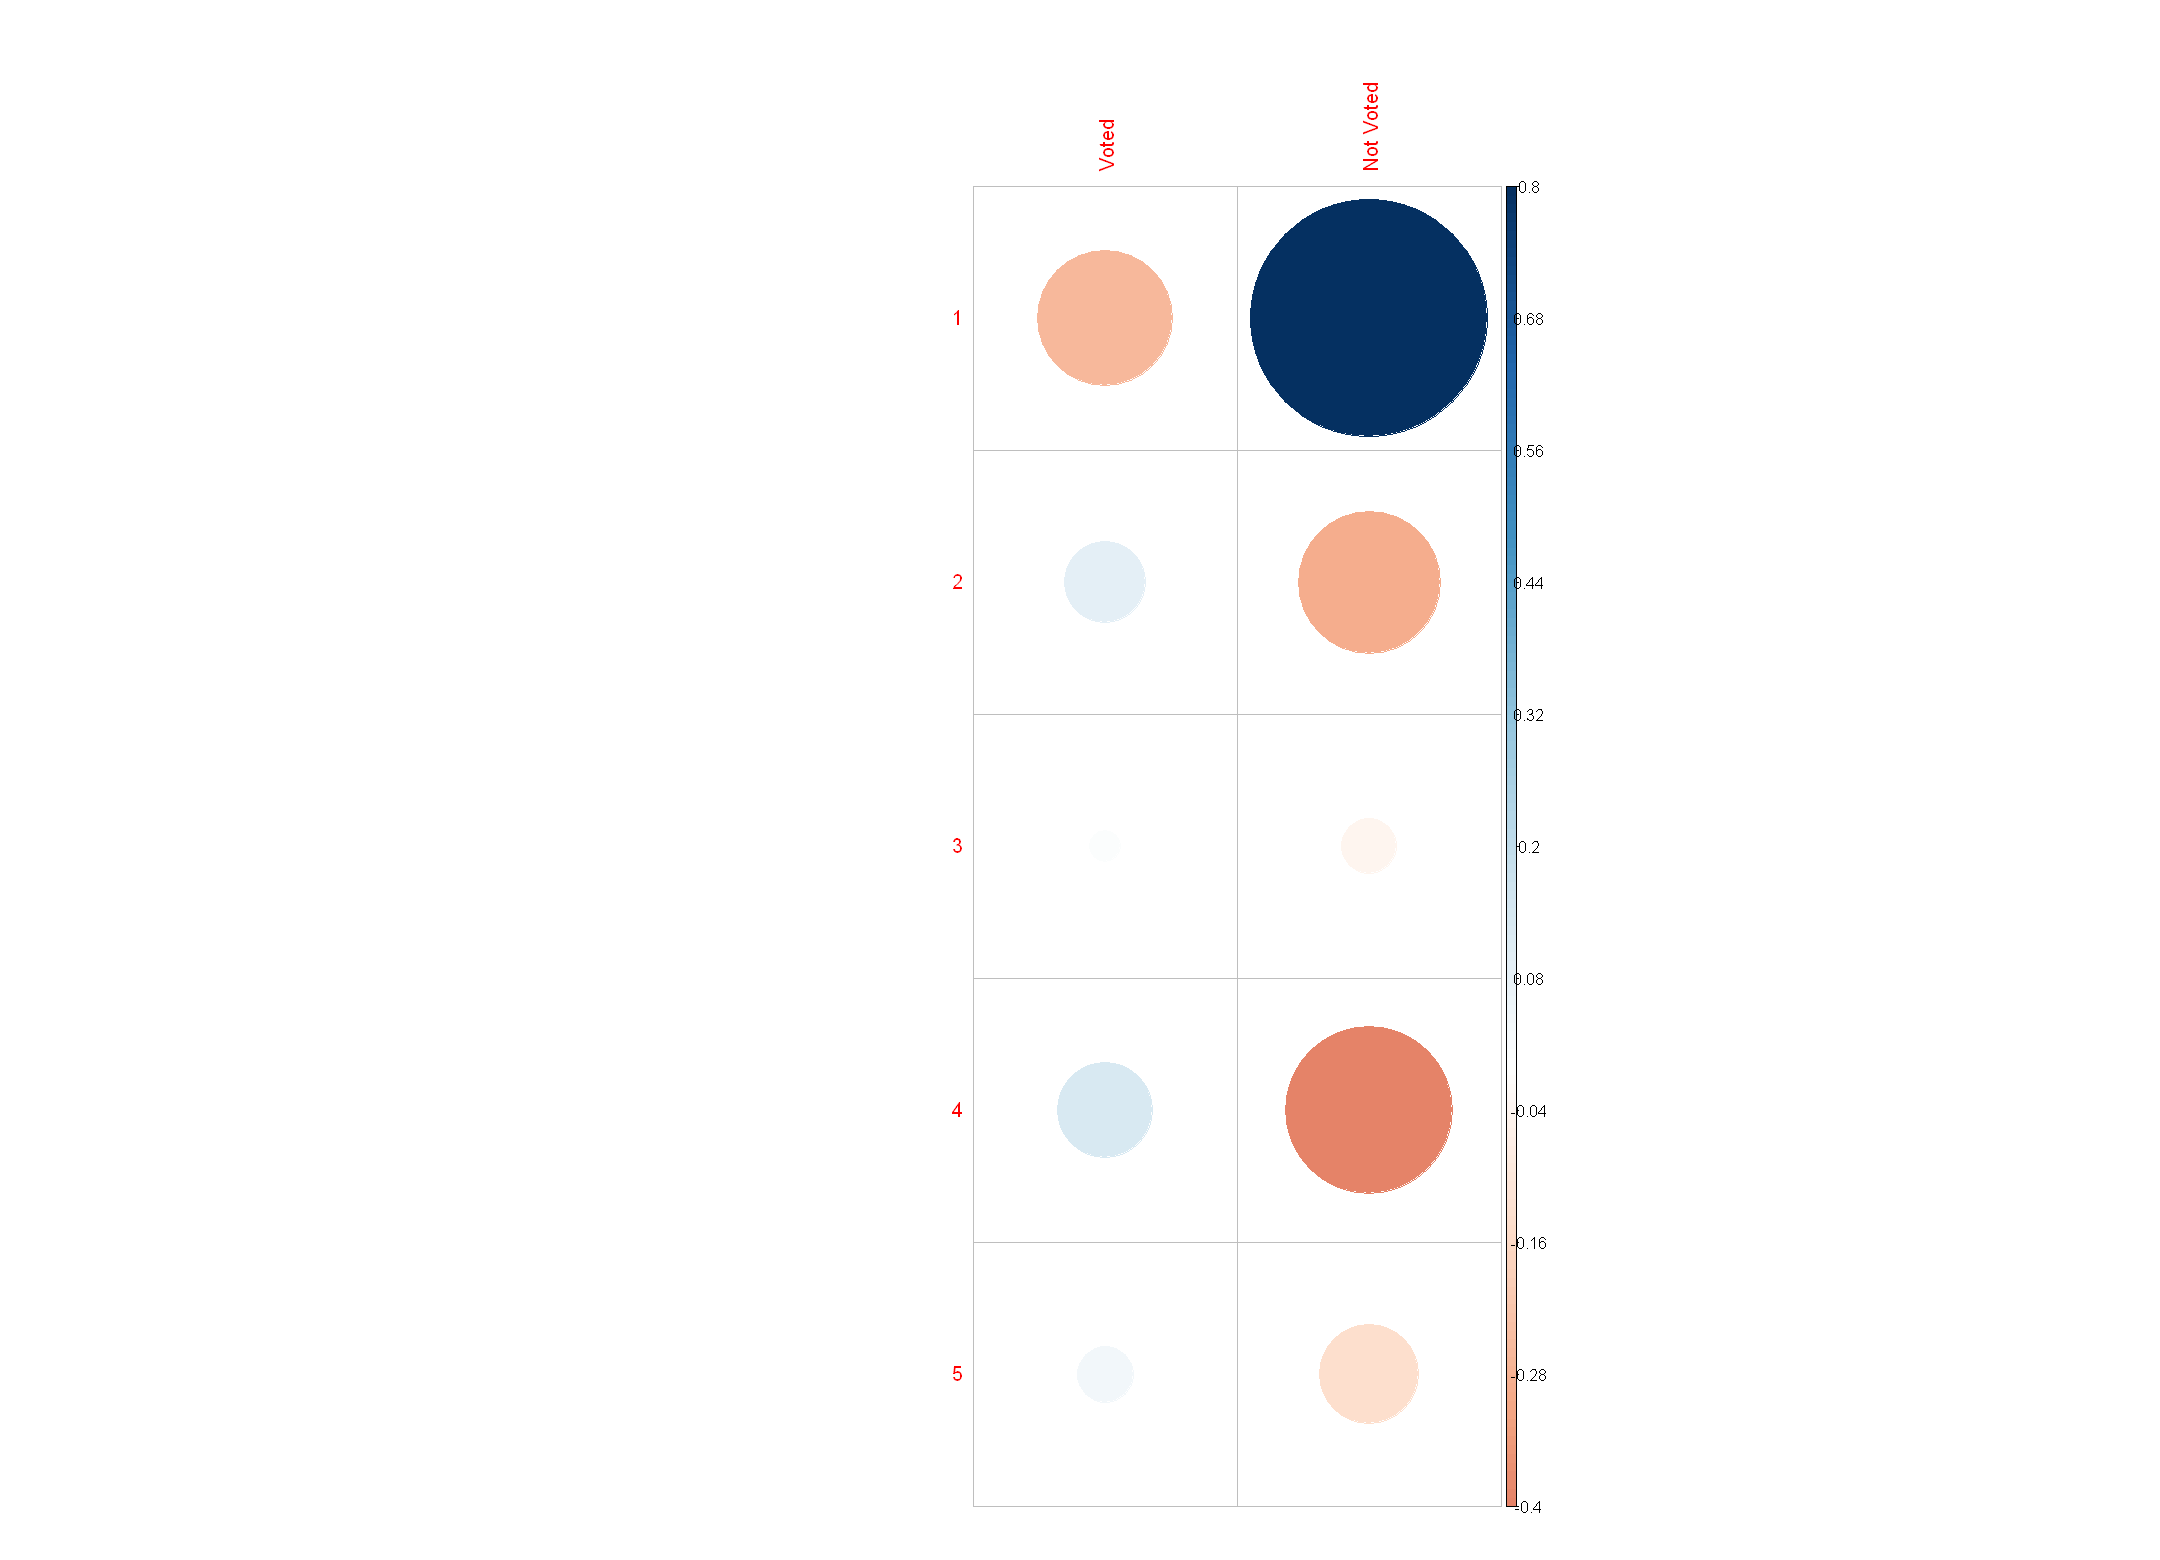

In [48]:
#fear chi square residuals
fear_chi_res = as.data.frame(round(fear_chi$residuals,2))
fear_chi_res$fear_scale = c("1-Not at all", "2-A little", "3-Somewhat", "4-Very", "5-Extremely")
fear_chi_res = fear_chi_res[c(3,1,2)]
fear_chi_res

corrplot(fear_chi$residuals, is.cor = FALSE)

>Similar to the previous anger chi-square test, we observe an identical pattern in terms of association with fear, but to a lesser degree:
>- **Voters:** In the plot above, there is a strong positive association with "very" level of fear and a moderate association with extreme level of fear
>- **Non-Voters:** In the plot above, there is a strong positive association with no fear (Not at all) and a strong disassociation against very and extreme levels of fear.

>To assess for practical significance or the effect size of the chi-square tests, there are 3 options at our disposal:
>1. Cramer's V
>2. Phi ($\phi$)
>3. Odds ratio (OR) 
>
> For the goodness of fit in 2 × 2 contingency tables, Phi is appropriate as it's equivalent to the correlation coefficient r, and a measure of effect size. However, our dataset is a not a 2x2 contingency table. Thus, we decided to leverage Cramer's V to assess for practical significance, whhich can be characterized as the equation below. We also referenced this [article from the National Center for Biotechnology Information](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5426219/).
>
>$$V = \sqrt{\frac{\chi^2}{n * df}}$$ 
> df = min(r – 1, c – 1) and r = number of rows and c = number of columns in the contingency table.
>
> We will also be using the below table to interpret the computed effect size (based Jacob Cohen's [Statistical Power Analysis for the Behavioral Sciences](https://books.google.com/books?hl=en&lr=&id=rEe0BQAAQBAJ&oi=fnd&pg=PP1&ots=sv0TKsMPs6&sig=Rpfkd0H-EB0-ZhKjsdDdSDgTdx4#v=onepage&q&f=false)): 
>
>|df   |Small   |Medium   |Large   |
|---|---|---|---|
|1  |.10   |.30   |.50   |
|2 |.07   |.21   |.35   |
|3   |.06   |.17   |.29   |
|4   |.05   |.15   |.25   |
|5   |.04   |.13   |.22   |

In [49]:
#anger effect size
Cramers_V <- function(chi, n, df) round(sqrt((as.numeric(chi))/(n * df)),3) #custom Cramers_V function

df = min(dim(df_a)) - 1 #degrees of freedom; min(r – 1, c – 1) and r = number of rows and c = number of columns in the contingency table.
paste("Degree of freedom is:", df)

anger_effect = Cramers_V(chi = anger_chi$statistic, n = sum(colSums(df_a[,-1])), df = df) #V value calculation
paste("Anger V-value:", anger_effect)

[1] "Degree of freedom is: 2"

[1] "Anger V-value: 0.058"

In [50]:
#fear effect size
df2 = min(dim(df_f)) - 1 #degrees of freedom; min(r – 1, c – 1) and r = number of rows and c = number of columns in the contingency table.
paste("Degree of freedom is:", df)

fear_effect = Cramers_V(chi = fear_chi$statistic, n = sum(colSums(df_f[,-1])), df = df2) #V value calculation
paste("Fear V-value:", fear_effect)

[1] "Degree of freedom is: 2"

[1] "Fear V-value: 0.016"

> #### Q4 Results Interpretation
>- **Statistical significance:** Because both the anger and fear (afraid)'s chi-square test returned a very small p-value, we can reject the null hypothesis and support that both emtions are associated with increased voter turnout in 2018 midterm elections.
>
>- **Practical significance:** Because the V value for both emotions are quite small with the same degree of freedom, neither of them are practically significant. However, because anger's V-value is higher than fear, anger seems to be more influential with respect to voter turnout.
>
>In conclusion, the chi-square test indicates that if you want people to show up at the ballot box, anger is a compelling impetus.

## Question 5: Select a fifth question that you believe is important for understanding the behavior of voters

### Clearly argue for the relevance of this question.  (10 points)
In words, clearly state your research question and argue why it is important for understanding the recent voting behavior. Explain it as if you were presenting to an audience that includes technical and non technical members.

Explain how your variables are operationalized.  Comment on any gaps that you can identify between your operational definitions and the concepts you are trying to study.



### Perform EDA and select your hypothesis test (5 points)

Perform an exploratory data analysis (EDA) of the relevant variables.

This should include a treatment of non-response and other special codes, basic sanity checks, and a justification for any values that are removed.  Use visual tools to assess the relationship among your variables and comment on any features you find.

Based on your EDA, select an appropriate hypothesis test.
Explain why your test is the most appropriate choice.  List and evaluate all assumptions for your test.

- Differences in some variables between form 1 and 2

### Conduct your test. (2 points)
Explain (1) the statistical significance of your result, and (2) the practical significance of your result.

### Conclusion (3 points)
Clearly state the conclusion of your hypothesis test and how it relates to your research question.

Finally, briefly present your conclusion in words as if you were presenting to an audience that includes technical and non technical members.